In [2]:
import pickle
import datetime
import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates
from huggingface_hub.hf_api import repo_info
from huggingface_hub.hf_api import ModelInfo
from huggingface_hub.hf_api import list_models
from huggingface_hub.hf_api import list_repo_commits
from huggingface_hub.utils._errors import GatedRepoError, RepositoryNotFoundError, HfHubHTTPError

In [172]:
%matplotlib widget

In [206]:
sns.set_theme(style = 'white')

In [4]:
def get_stat(d_pd):
    st = {'Average':round(d_pd.mean(),2),'Median':round(d_pd.median(),2),
          'Std':round(d_pd.std(),2),
          'Minimum value':d_pd.min(),'Maximum Value':round(d_pd.max(),2)}
    leg = ''
    for key,value in st.items():
        leg = leg+'{}:  {}\n'.format(key,value)
    return leg.rstrip()

def plot_data(d_pd,xlabel,ylabel, x_location=0.72, y_location=0.94,bins='auto',width=12, height=7, dpi=150,
             log_scale=(False, False)):
    #binwidth=120
    fig, ax = plt.subplots(figsize=(width, height), dpi=150)
    ax = sns.histplot(data=d_pd, bins=bins ,ax=ax, log_scale=log_scale)
    plt.ylabel(ylabel, fontsize = 16),
    plt.xlabel(xlabel, fontsize=16)
    props = dict(boxstyle='round,pad=1',facecolor='lightblue',alpha=0.6)
    st = get_stat(d_pd);
    ax.text(x_location,y_location, st ,transform=ax.transAxes, fontsize=12
            , verticalalignment='top',bbox=props, weight='normal')
   
    ax.bar_label(ax.containers[1])
    #ax.axes[0].set_yscale('log')
    fig.tight_layout()

In [11]:

print(f'number of models on HF: {len(model_list)}')

In [ ]:
model_data = []
for model in model_list:
    try:
        model = model.id
        model_data.append({'repo_info':repo_info(model, files_metadata=True), 'commit_info': list_repo_commits(model), 'status':'working'})
    except (GatedRepoError, RepositoryNotFoundError) as e:
        model_data.append({'repo_info':None, 'commit_info': None, 'status':'not working'})

In [ ]:
new_model_list = model_list[len(model_data):]
for model in new_model_list:
    try:
        model = model.id
        model_data.append({'repo_info':repo_info(model, files_metadata=True), 'commit_info': list_repo_commits(model), 'status':'working'})
    except (GatedRepoError, RepositoryNotFoundError, HfHubHTTPError) as e:
        model_data.append({'repo_info':None, 'commit_info': None, 'status':'not working'})

In [3]:
with open('model_infor_hf.pkl', 'rb') as f:
    data = pickle.load(f)
current_model_list = len(data)
data = [i for i in data if i['status']=='working']

pd_data = []
for info in data:
    c = info['repo_info']
    b = info['commit_info']
    pd_data.append(
        {'likes':c.likes, 'num_downloads':c.downloads, 'repo_id':c.id, 
        'model_id':c.modelId, 'repo_size':sum(i.size for i in c.siblings),  
        'author':c.author,
        'pipeline_tag':c.pipeline_tag,
        'tags':c.tags,
        'first_commit':sorted([i.created_at for i in b])[0],
        'last_modified': parser.parse(c.lastModified,ignoretz=True).replace(tzinfo=datetime.timezone.utc),
        'commit_history':sorted([i.created_at for i in b])}
    )

df = pd.DataFrame(pd_data)

In [4]:
df.to_csv('repo_pop.csv', index=False)

In [5]:
with open('model_list_hf.pkl', 'rb') as f:
    model_list = pickle.load(f)

all_model_list = len(model_list)
current_model_list = all_model_list

df = pd.read_csv('repo_pop.csv')
df['first_commit'] = pd.to_datetime(df['first_commit'])
print(f'Number of models on HuggingFace by: 7th July 2023 - {all_model_list}')
print(f'Number of models currently have: {current_model_list}/{all_model_list} - {(current_model_list/all_model_list)*100:.2f}%')
print(f'Number of models with info: {len(df)}/{all_model_list} - {(len(df)/all_model_list)*100:.2f}%')
print(f'Number of models with no or restricted info: {current_model_list-len(df)} - {((current_model_list-len(df))/all_model_list)*100:.2f}%')

Number of models on HuggingFace by: 7th July 2023 - 251075
Number of models currently have: 251075/251075 - 100.00%
Number of models with info: 249183/251075 - 99.25%
Number of models with no or restricted info: 1892 - 0.75%


- Number of models on HuggingFace (7th July 2023): &nbsp; $251075 (251.08k)$
- Number of models currently have: &ensp; &ensp;  &emsp; &emsp; &emsp;&emsp; &emsp; &emsp; $251075$  -  $100.00\%$
- Number of models with info: &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; $249183$ - $99.25\% $
- Number of models with no or restricted info: &emsp; &emsp; &emsp; &emsp; $1892$ &nbsp;-    $0.75\% $

**Features we have**
- Number of likes
- Number of downloads
- Pipeline tag
- Model related tags
- Author name
- Repo ID
- Storage size of each repo (includes size of model(s) and metadata)
- Repo First added
- Repo last modified
- Repo's entire history from first to latest for each file

One of the plot that can be constructed is number of models uploaded to HuggingFace over time

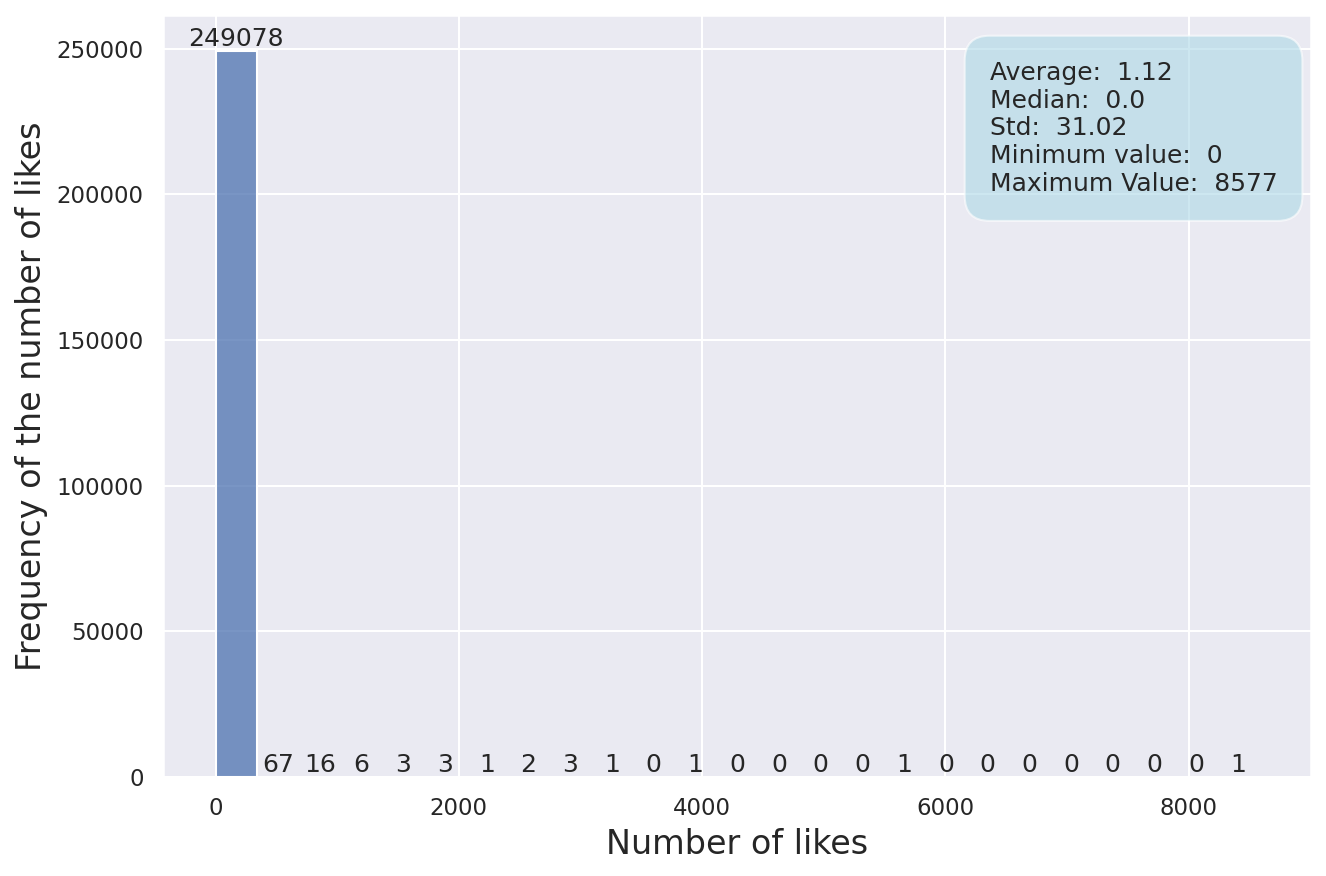

In [123]:
col_name = 'likes'
plot_data(df[col_name], 'Number of likes', 'Frequency of the number of likes', bins=25, width=9, height=6, dpi=150)
plt.show()

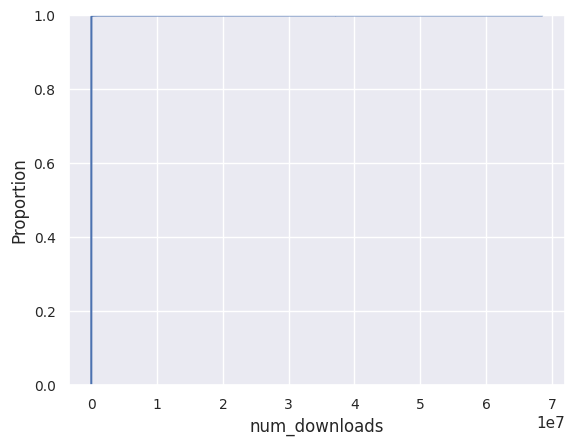

In [79]:
ax = sns.ecdfplot(df[col_name])
ax.tick_params(axis='both', which='both', labelsize=10)
plt.show()

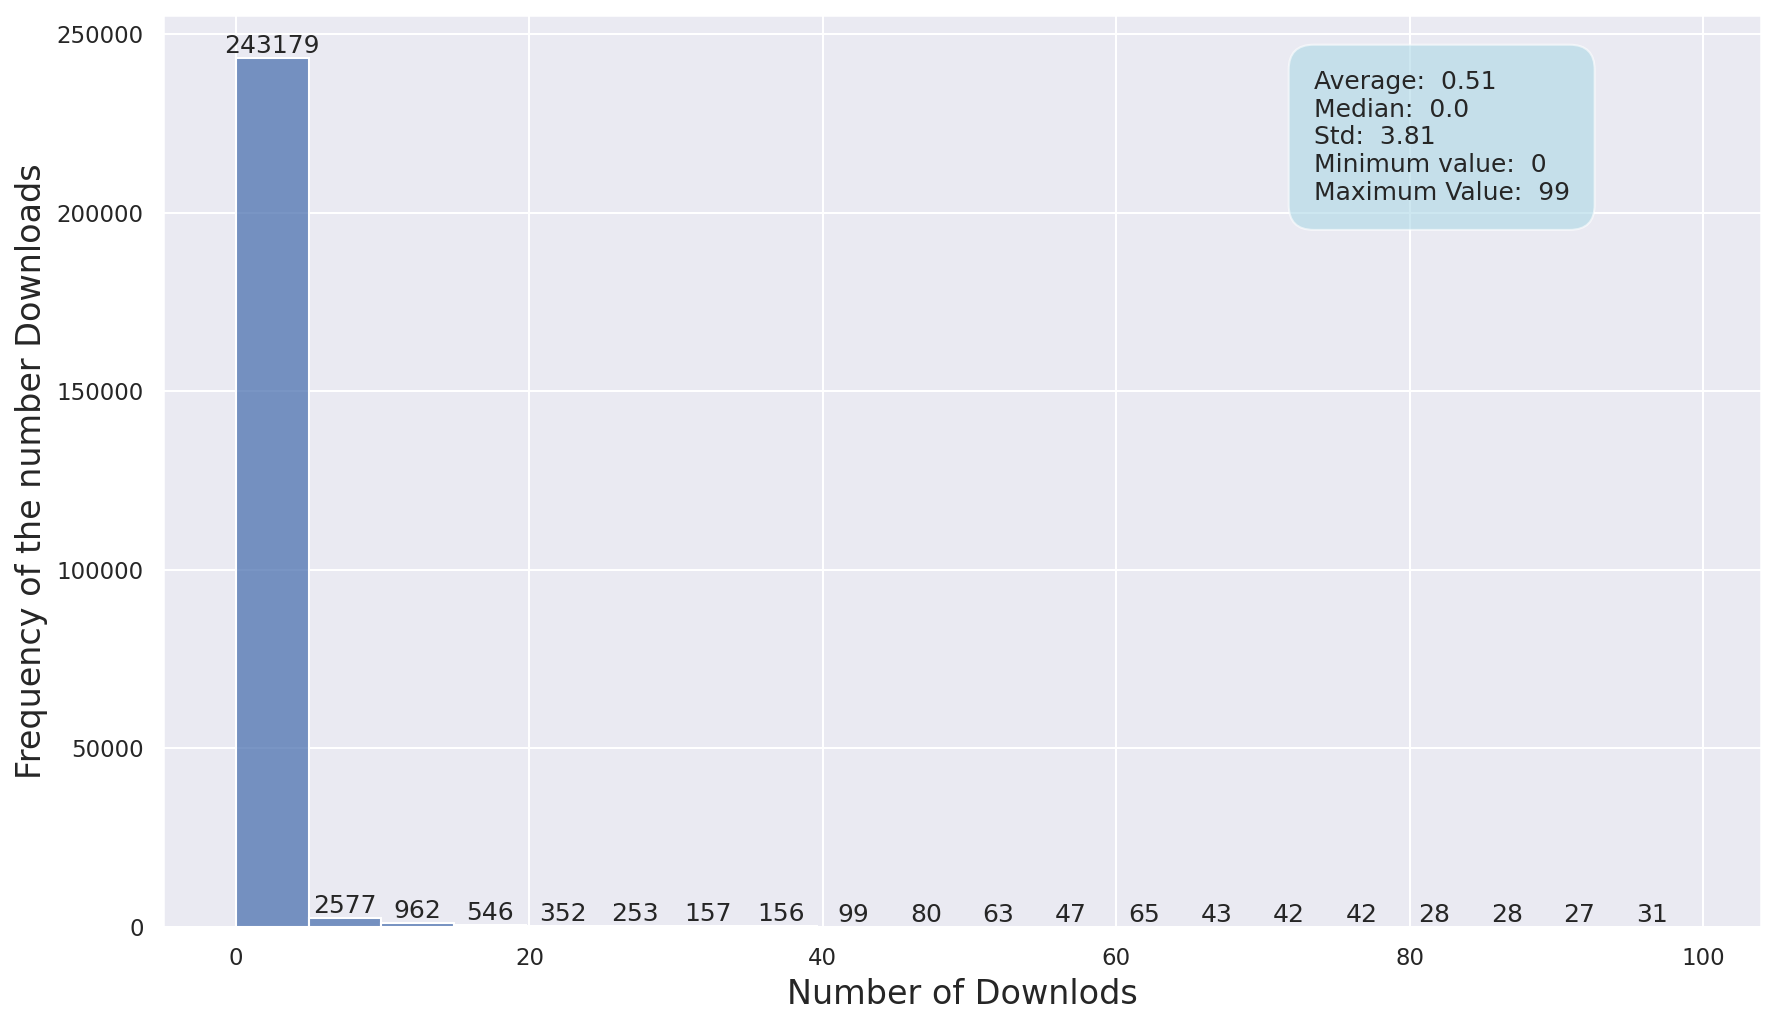

In [124]:
col = df[col_name]
col_limit = 100
if col_limit:
    col = col[col<col_limit]
plot_data(col, 'Number of Downlods', 'Frequency of the number Downloads', bins=20)
plt.show()

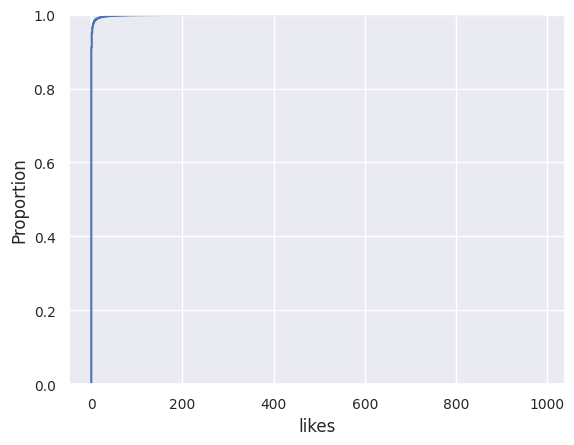

In [87]:
col = df[col_name]
if col_limit:
    col = col[col<col_limit]
ax = sns.ecdfplot(col)
ax.tick_params(axis='both', which='both', labelsize=10)
plt.show()

In [88]:
col_df = df.loc[df[col_name]>col_limit][[col_name, 'model_id']]
#col_df.sort_values(by='num_downloads', ascending=False)
col_df = col_df.sort_values(by=col_name, ascending=False)
col_df[col_name] = col_df.sort_values(by=col_name, ascending=False)[col_name].apply(lambda x: f'{x/col_limit:.2f} K')
col_df.iloc[:10]

,likes,model_id
76989,8.58 K,runwayml/stable-diffusion-v1-5
63646,5.73 K,CompVis/stable-diffusion-v1-4
43734,3.79 K,bigscience/bloom
92120,3.19 K,WarriorMama777/OrangeMixs
126714,3.04 K,lllyasviel/ControlNet
93279,2.83 K,stabilityai/stable-diffusion-2-1
82373,2.76 K,prompthero/openjourney
147904,2.46 K,THUDM/chatglm-6b
63631,2.43 K,CompVis/stable-diffusion-v-1-4-original
65159,2.17 K,hakurei/waifu-diffusion


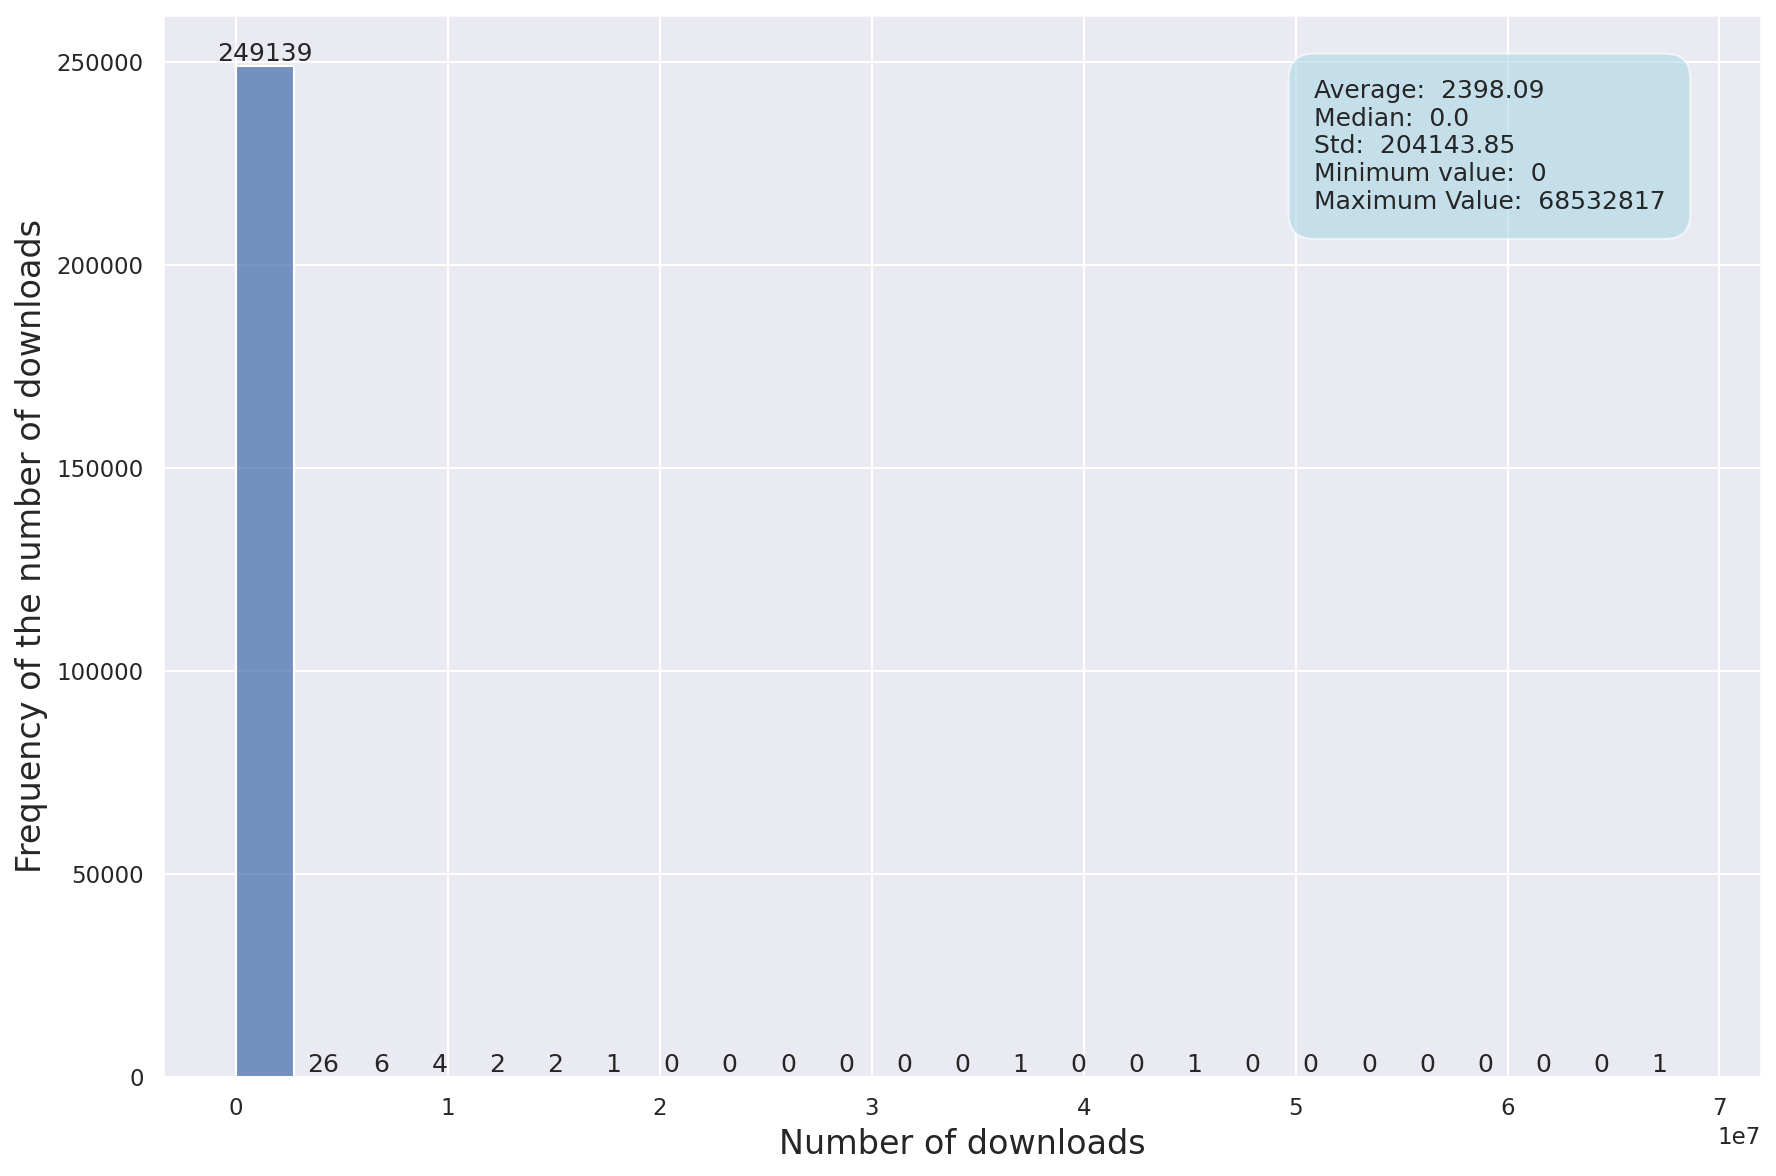

In [91]:
col_name = 'num_downloads'
plot_data(df[col_name], 'Number of downloads', 'Frequency of the number of downloads', bins=25, width=12, height=8, dpi=150)
plt.show()

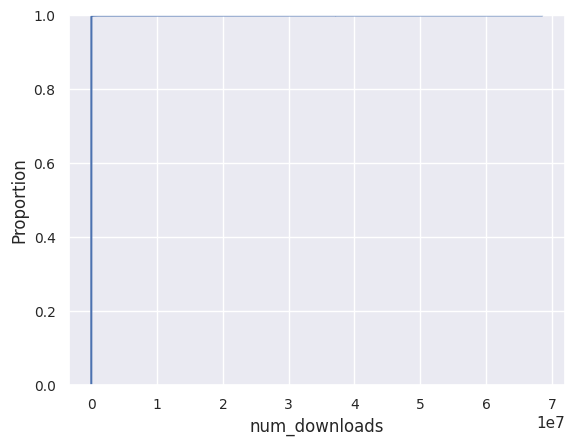

In [69]:
ax = sns.ecdfplot(df[col_name])
ax.tick_params(axis='both', which='both', labelsize=10)

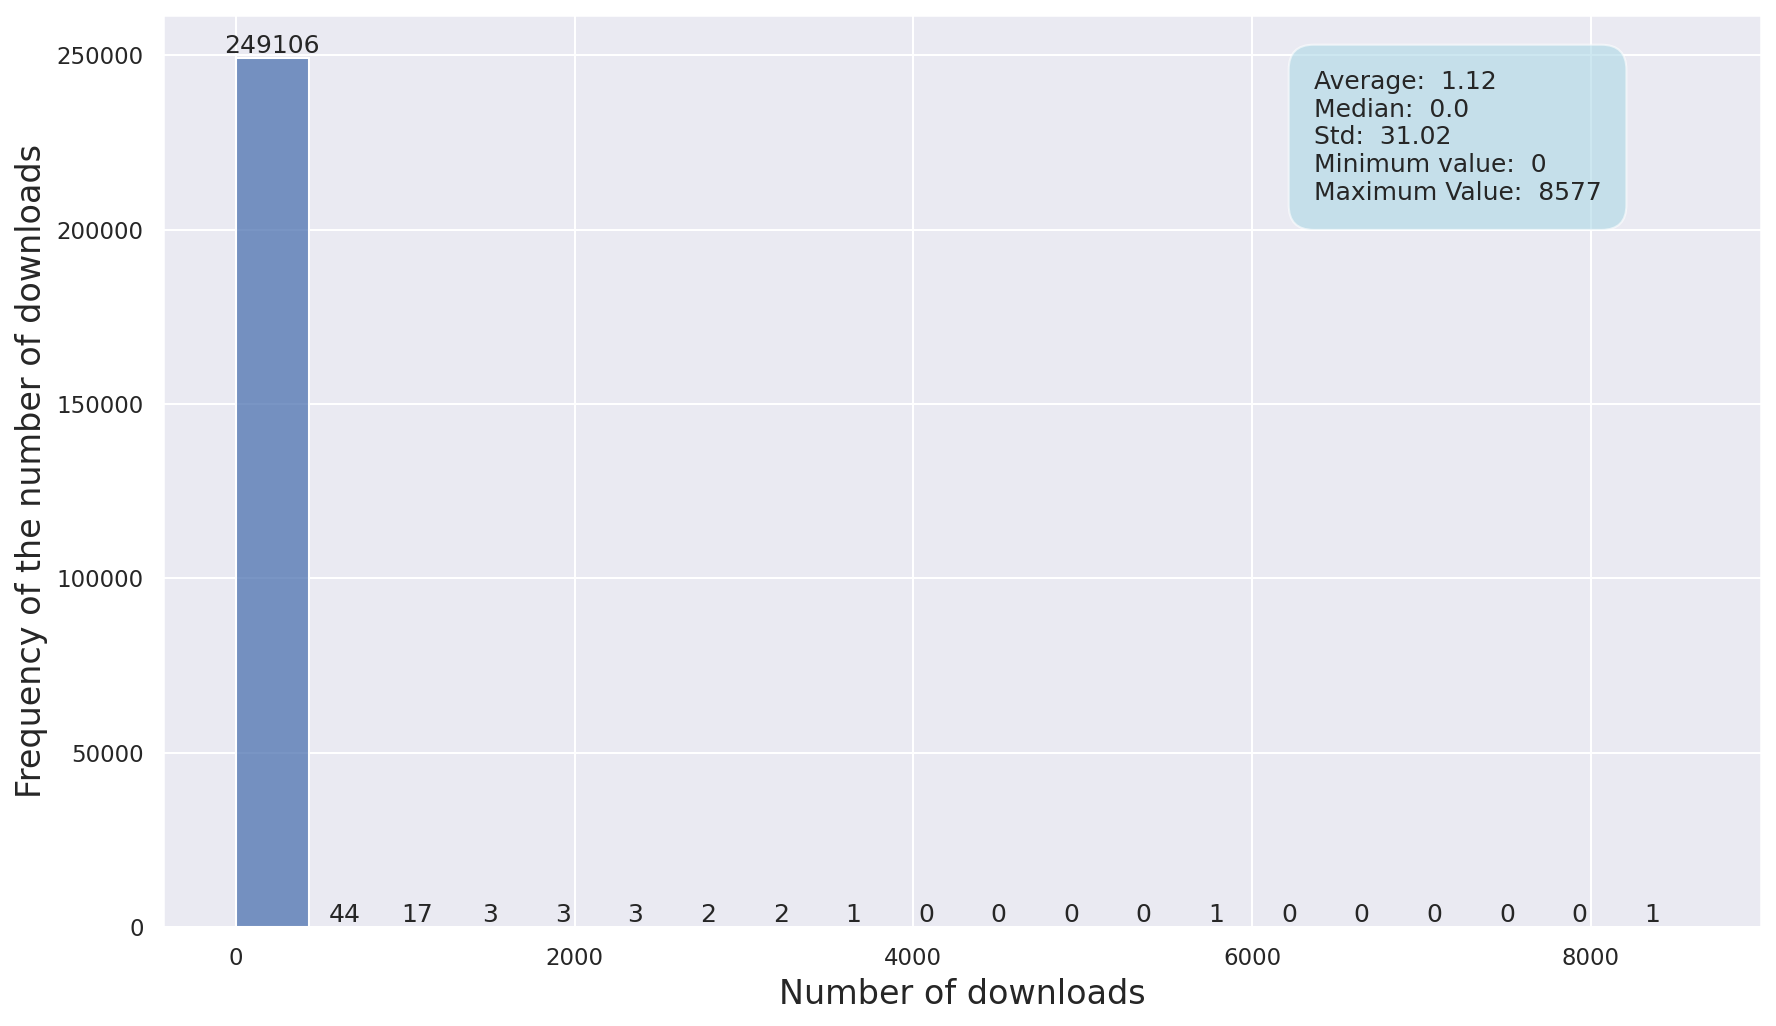

In [89]:
col = df[col_name]
col_limit = 1e4
if col_limit:
    col = col[col<col_limit]
plot_data(col,'Number of downloads', 
          'Frequency of the number of downloads', bins=20, log_scale=(False, False))
plt.show()

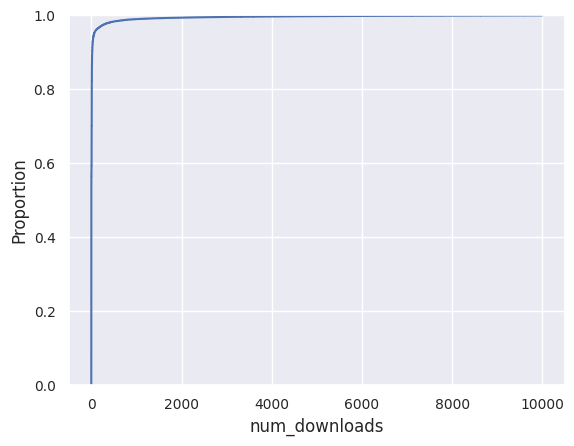

In [92]:
col = df[col_name]
if col_limit:
    col = col[col<col_limit]
ax = sns.ecdfplot(col)
ax.tick_params(axis='both', which='both', labelsize=10)
plt.show()

In [93]:
col_limit = 1e6
col_df = df.loc[df[col_name]>col_limit][[col_name, 'model_id']]
#col_df.sort_values(by='num_downloads', ascending=False)
col_df = col_df.sort_values(by=col_name, ascending=False)
col_df[col_name] = col_df.sort_values(by=col_name, ascending=False)[col_name].apply(lambda x: f'{x/col_limit:.2f} Mil')
col_df.iloc[:10]

,num_downloads,model_id
20767,68.53 Mil,jonatasgrosman/wav2vec2-large-xlsr-53-english
16,44.26 Mil,bert-base-uncased
65,37.09 Mil,xlm-roberta-large
63990,17.42 Mil,sociocom/MedNER-CR-JA
37,16.34 Mil,gpt2
24557,16.08 Mil,openai/clip-vit-large-patch14
22,12.80 Mil,bert-large-uncased
60,12.33 Mil,xlm-roberta-base
31,10.90 Mil,distilbert-base-uncased
40,10.87 Mil,roberta-base


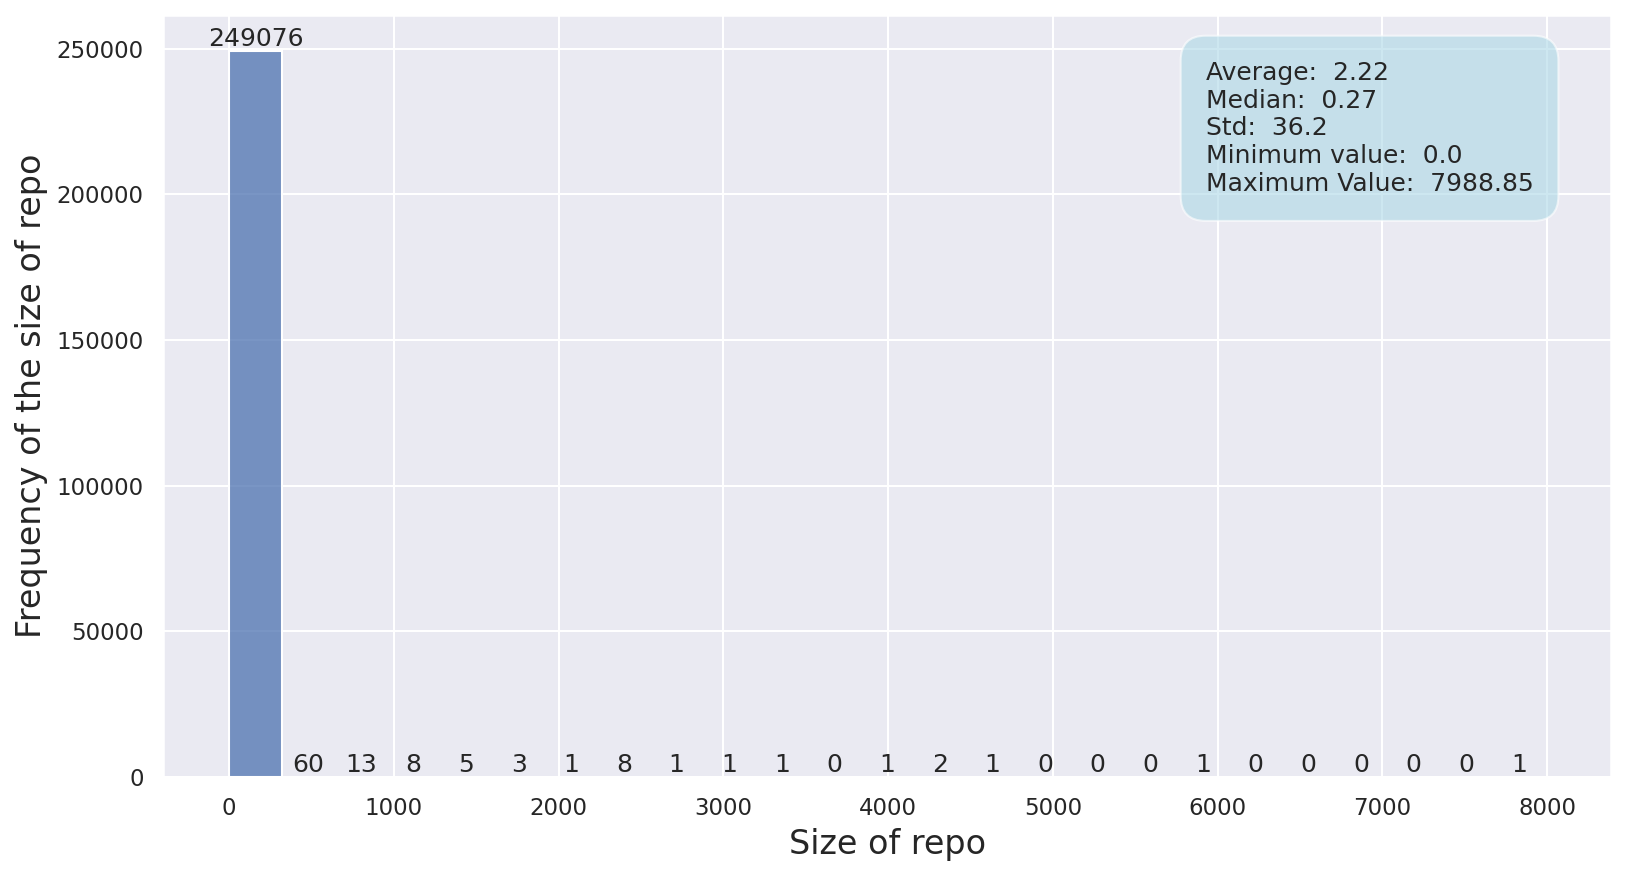

In [98]:
col_name = 'repo_size'
scaling_factor = 1e9
plot_data(df[col_name]/scaling_factor, 'Size of repo (Gb)', 'Frequency of the size of repo', bins=25, width=11, height=6, dpi=150)
plt.show()

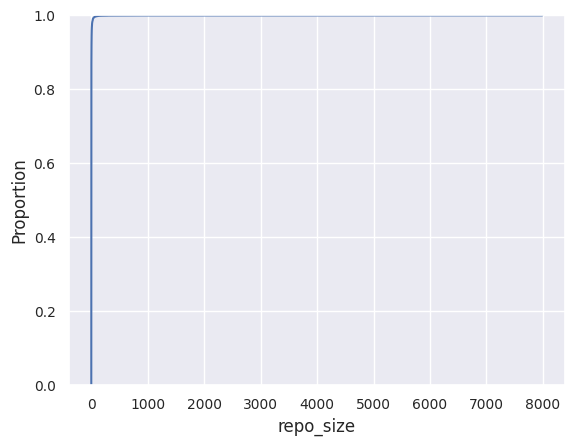

In [100]:
col = df[col_name]/scaling_factor
ax = sns.ecdfplot(col)
ax.tick_params(axis='both', which='both', labelsize=10)
plt.show()

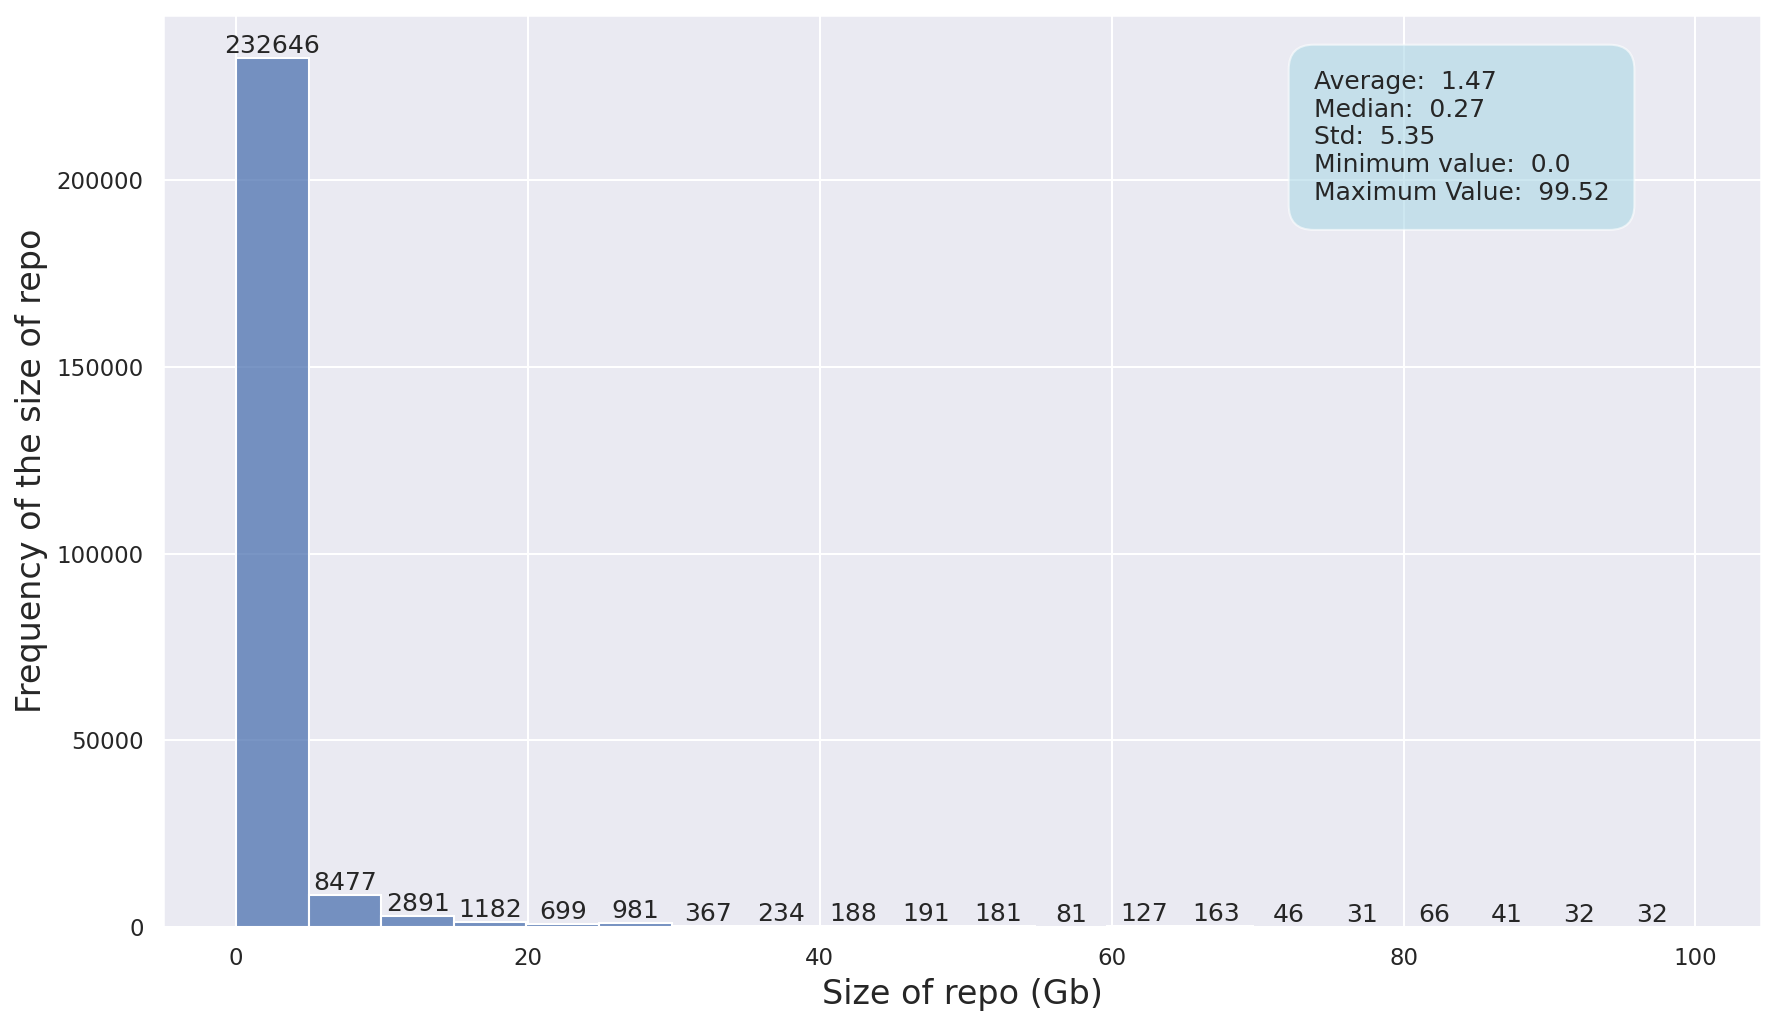

In [112]:
col = df[col_name]/scaling_factor
col_limit = 100
if col_limit:
    col = col[col<col_limit]
plot_data(col,'Size of repo (Gb)', 'Frequency of the size of repo', bins=20, log_scale=(False, False))
plt.show()

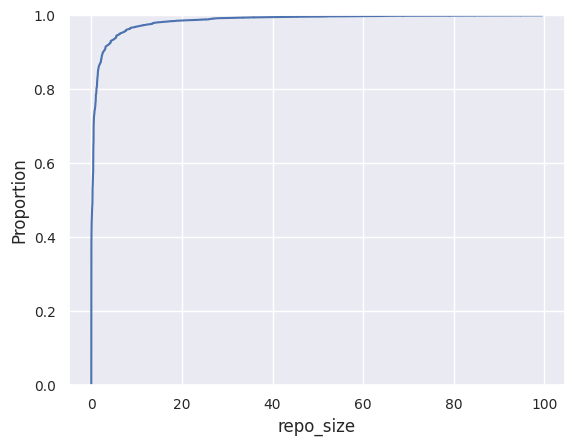

In [111]:
col = df[col_name]/scaling_factor
col_limit = 100
if col_limit:
    col = col[col<col_limit]
ax = sns.ecdfplot(col)
ax.tick_params(axis='both', which='both', labelsize=10)
plt.show()

In [113]:
col_df = df.loc[df[col_name]>col_limit][[col_name, 'model_id']]
#col_df.sort_values(by='num_downloads', ascending=False)
col_df = col_df.sort_values(by=col_name, ascending=False)
col_df[col_name] = col_df.sort_values(by=col_name, ascending=False)[col_name].apply(lambda x: f'{x/scaling_factor:.2f} Gb')
col_df.iloc[:10]

,repo_size,model_id
234263,7988.85 Gb,HugeOcean/MotherloadMirror
98628,6054.54 Gb,laion/scaling-laws-openclip
165898,4752.79 Gb,RectalWorm/models
242345,4291.12 Gb,HugeOcean/MotherloadMirror4
238726,4216.43 Gb,HugeOcean/MotherloadMirror2
240250,4144.25 Gb,HugeOcean/MotherloadMirror3
153877,3286.58 Gb,datablations/lm1-misc
81291,3142.80 Gb,google/switch-c-2048
68816,2820.76 Gb,bigscience/bloomz-ckpts
57286,2511.08 Gb,bigscience/bloom-optimizer-states


In [122]:
#huggingtweet is a tweet generator model trained on tweets of a person
col_name = 'author'
auth_df = df.groupby(col_name)[col_name].count().sort_values(ascending=False)
auth_df.iloc[:10]

author
huggingtweets          3830
Jeevesh8               3258
Helsinki-NLP           1440
jonatasgrosman         1265
cleanrl                1157
timm                   1138
testorga13h1           1089
YakovElm               1059
sd-concepts-library     971
gokuls                  830
Name: author, dtype: int64

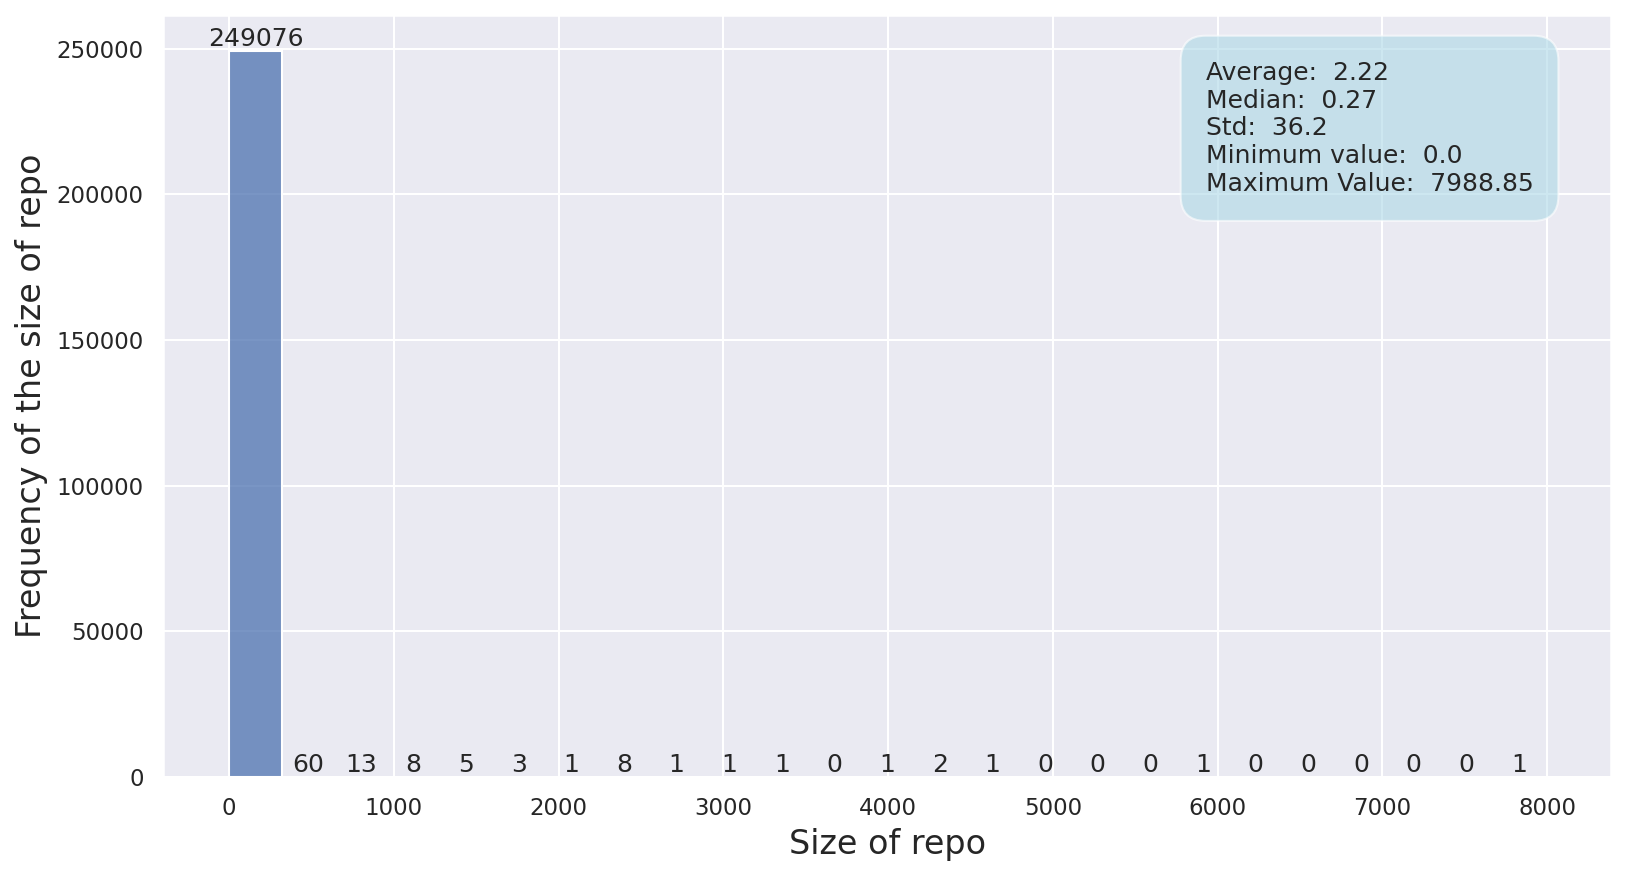

In [101]:
col_name = 'repo_size'
scaling_factor = 1e9
col_limit = 1e
col_df = df.loc[df[col_name]>col_limit][[col_name, 'model_id']]
col_df[col_name] = df[col_name]/scaling_factor
plot_data(df[col_name]/scaling_factor, 'Size of repo', 'Frequency of the size of repo', bins=25, width=11, height=6, dpi=150)
plt.show()

,repo_size,model_id
234263,7988.85 Gb,HugeOcean/MotherloadMirror
98628,6054.54 Gb,laion/scaling-laws-openclip
165898,4752.79 Gb,RectalWorm/models
242345,4291.12 Gb,HugeOcean/MotherloadMirror4
238726,4216.43 Gb,HugeOcean/MotherloadMirror2
240250,4144.25 Gb,HugeOcean/MotherloadMirror3
153877,3286.58 Gb,datablations/lm1-misc
81291,3142.80 Gb,google/switch-c-2048
68816,2820.76 Gb,bigscience/bloomz-ckpts
57286,2511.08 Gb,bigscience/bloom-optimizer-states


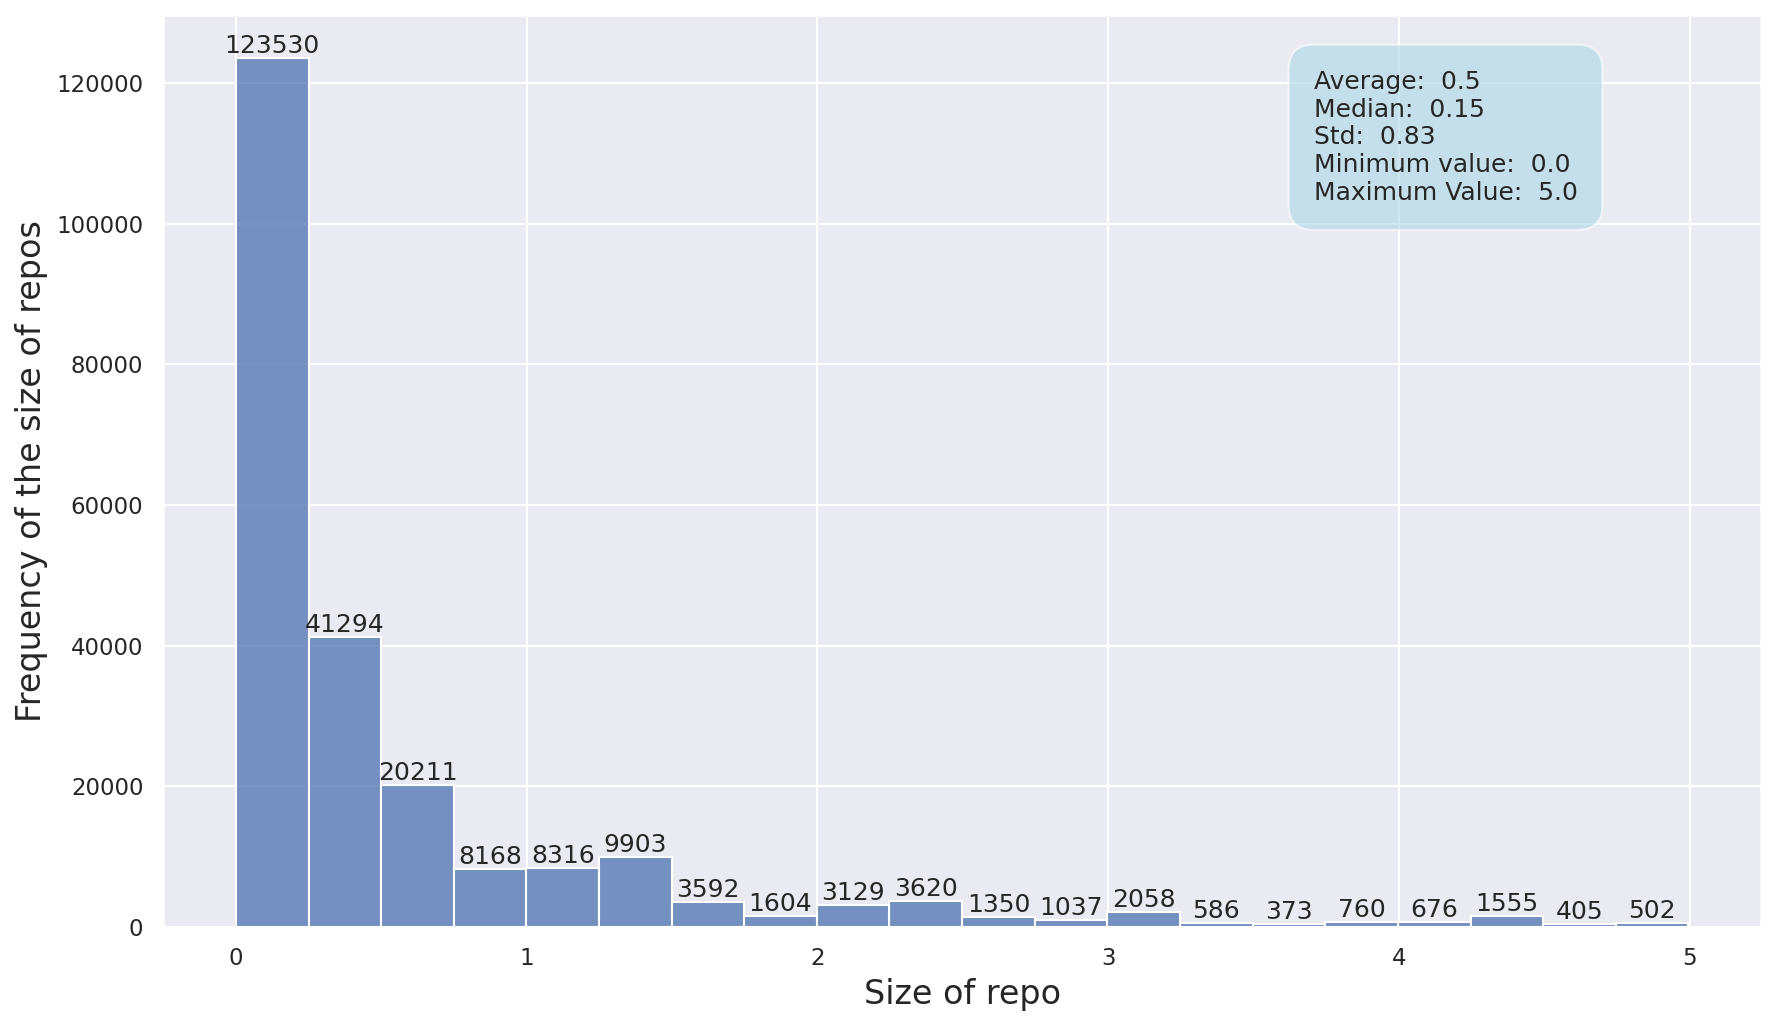

In [184]:

col = df[col_name]
col_limit = 5
if col_limit:
    col = col[col<col_limit]
else:
    pass
plot_data(col,'Size of repo', 
          'Frequency of the size of repos', bins=20, log_scale=(False, False))
plt.show()

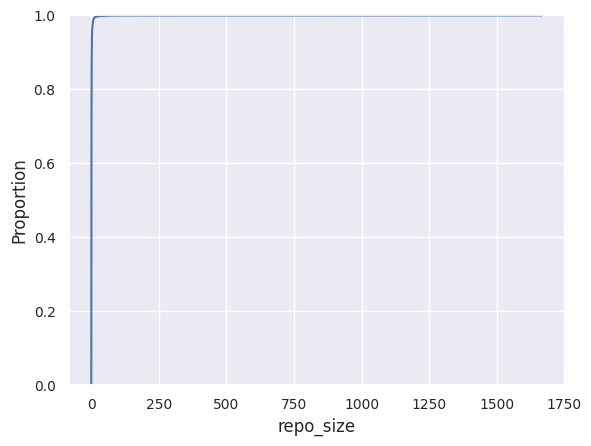

In [53]:
ax = sns.ecdfplot(col)
ax.tick_params(axis='both', which='both', labelsize=10)

/tmp/ipykernel_215202/1242811705.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


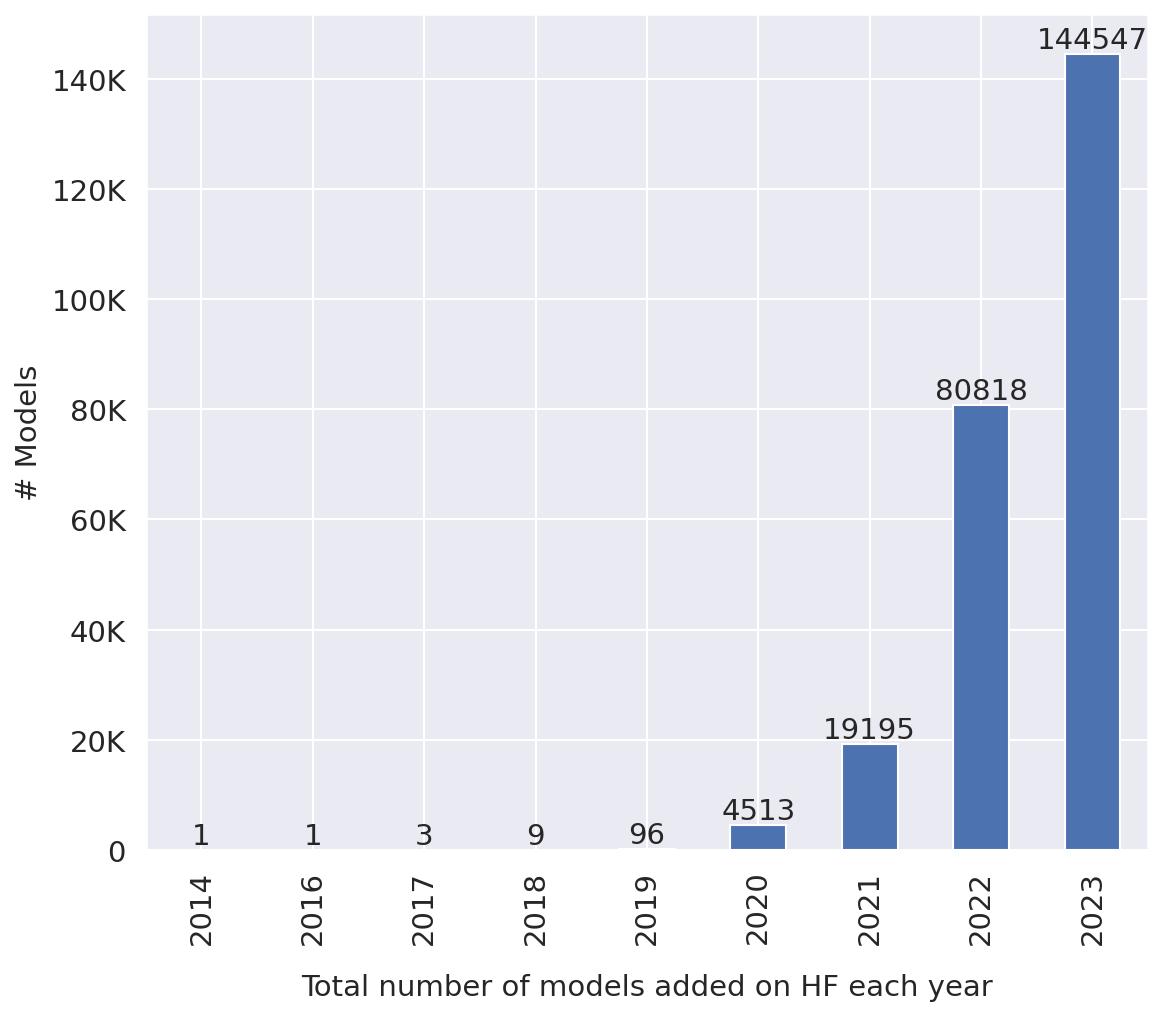

In [33]:
fig, ax = plt.subplots(figsize=(8, 7), dpi=150)
plt.rcParams['font.size'] = 14
ax = df.groupby(df["first_commit"].dt.year).count()['first_commit'].plot(kind="bar")
ax.bar_label(ax.containers[0])
ax.set_xlabel('Total number of models added on HF each year', fontsize=14, labelpad=14)
ax.set_ylabel('# Models', fontsize=14)
ax.tick_params(axis='x', which='major', labelsize=14)
ax.tick_params(axis='y', which='major', labelsize=14)
#ax.tick_params(axis='both', which='major', labelsize=14)

labels = [f'{int(item.get_text())/1e3:.0f}K' for item in ax.get_yticklabels()]
labels[0] = '0'
ax.set_yticklabels(labels)
plt.tight_layout()
plt.show()

/tmp/ipykernel_215202/2449269233.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


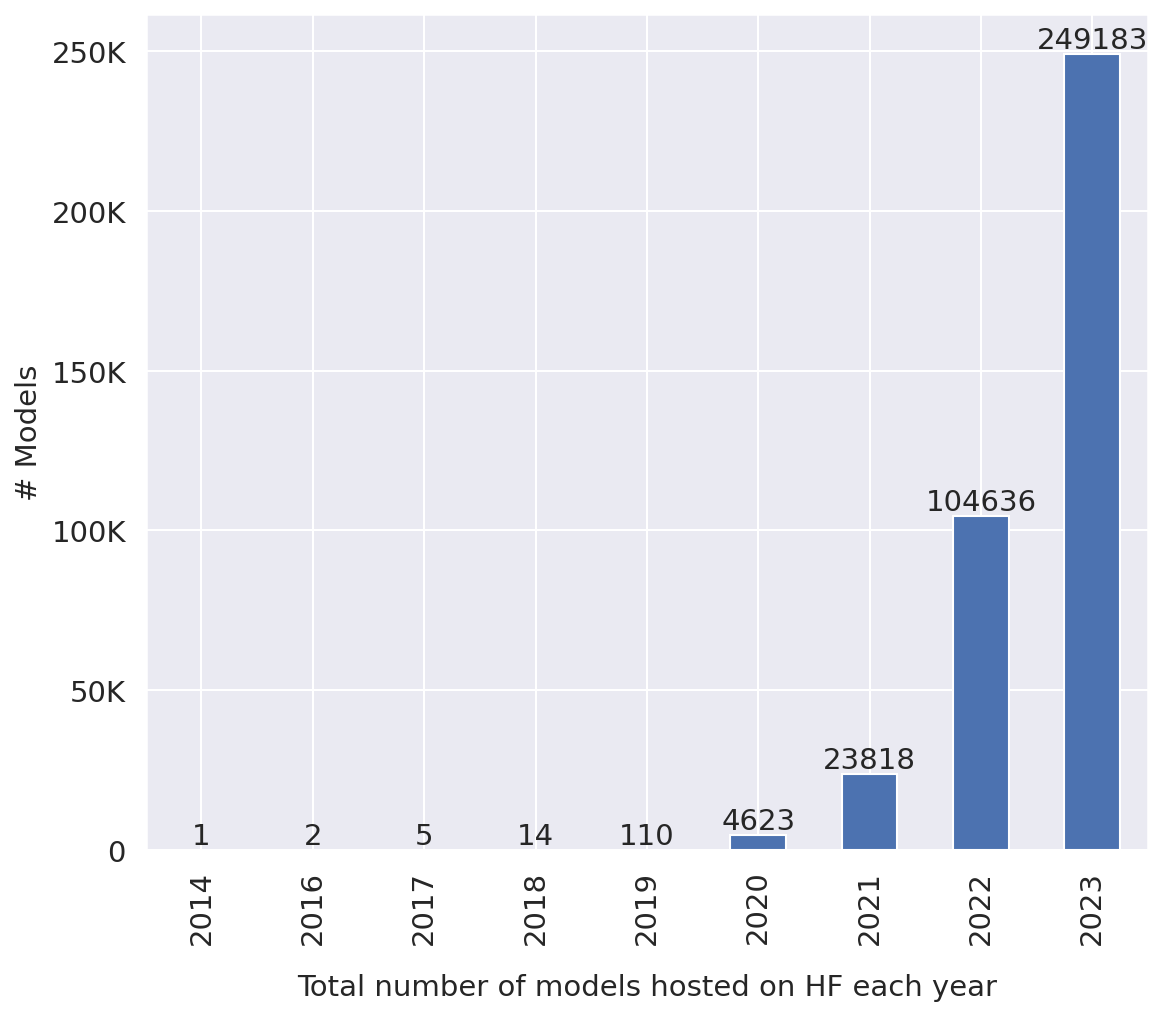

In [117]:
fig, ax = plt.subplots(figsize=(8, 7), dpi=150)
plt.rcParams['font.size'] = 14
ax = df.groupby(df["first_commit"].dt.year).count()['first_commit'].cumsum().plot(kind="bar")
ax.bar_label(ax.containers[0])
ax.set_xlabel('Total number of models hosted on HF each year', fontsize=14, labelpad=14)
ax.set_ylabel('# Models', fontsize=14)
ax.tick_params(axis='x', which='major', labelsize=14)
ax.tick_params(axis='y', which='major', labelsize=14)
#ax.tick_params(axis='both', which='major', labelsize=14)

labels = [f'{int(item.get_text())/1e3:.0f}K' for item in ax.get_yticklabels()]
labels[0] = '0'
ax.set_yticklabels(labels)
plt.tight_layout()
plt.show()

/tmp/ipykernel_215202/1906225158.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


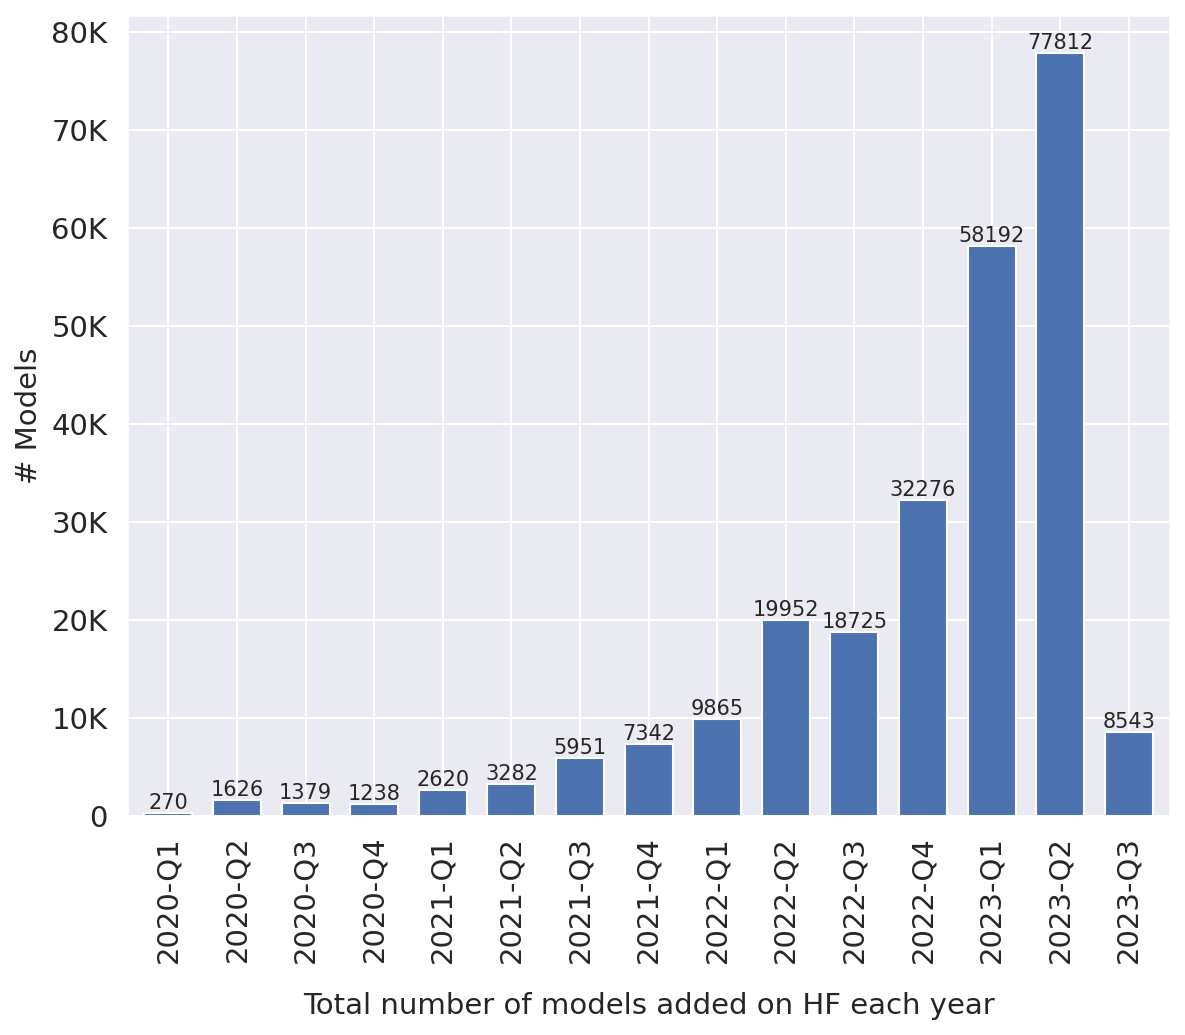

In [46]:
fig, ax = plt.subplots(figsize=(8, 7), dpi=150)
plt.rcParams['font.size'] = 10
ax = df.groupby(by=[df["first_commit"].dt.year, df["first_commit"].dt.quarter]).count()['first_commit']['2019-01-01':'2023-07-09'].plot(kind="bar" ,ax=ax, width=0.7)
ax.bar_label(ax.containers[0])
ax.set_xlabel('Total number of models added on HF each year', fontsize=14, labelpad=14)
ax.set_ylabel('# Models', fontsize=14)
ax.tick_params(axis='x', which='major', labelsize=14)
ax.tick_params(axis='y', which='major', labelsize=14)
#ax.tick_params(axis='both', which='major', labelsize=14)

labels = [f'{int(item.get_text())/1e3:.0f}K' for item in ax.get_yticklabels()]
labels[0] = '0'
ax.set_yticklabels(labels)

labels = [item.get_text().replace('(', '').replace(')', '').replace(',', '-Q').replace(' ','') for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)

plt.tight_layout()
plt.show()

In [83]:
c = ax.get_yticklabels()[0]

In [105]:
df.groupby(by=df["first_commit"].dt.to_period('Q')).count()['first_commit'].cumsum()['2019-01-01':'2023-07-09']


/tmp/ipykernel_226686/543753996.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df.groupby(by=df["first_commit"].dt.to_period('Q')).count()['first_commit'].cumsum()['2019-01-01':'2023-07-09']


first_commit
2019Q1        21
2019Q2        29
2019Q3        50
2019Q4       110
2020Q1       380
2020Q2      2006
2020Q3      3385
2020Q4      4623
2021Q1      7243
2021Q2     10525
2021Q3     16476
2021Q4     23818
2022Q1     33683
2022Q2     53635
2022Q3     72360
2022Q4    104636
2023Q1    162828
2023Q2    240640
2023Q3    249183
Freq: Q-DEC, Name: first_commit, dtype: int64

In [104]:
df.groupby(by=[df["first_commit"].dt.year, df["first_commit"].dt.quarter]).count()['first_commit'].cumsum()['2019-01-01':'2023-07-09'].unstack()

first_commit,1,2,3,4
first_commit,,,,
2020,380.0,2006.0,3385.0,4623.0
2021,7243.0,10525.0,16476.0,23818.0
2022,33683.0,53635.0,72360.0,104636.0
2023,162828.0,240640.0,249183.0,NaN


/tmp/ipykernel_226686/2158007182.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


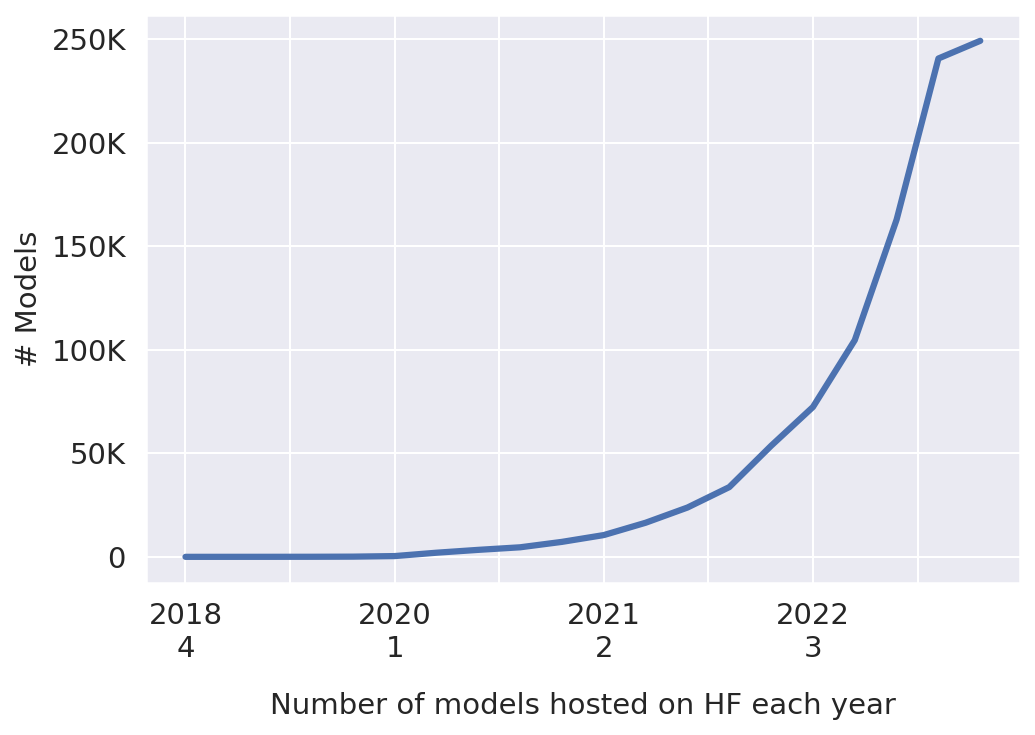

In [109]:
fig, ax = plt.subplots(figsize=(7, 5), dpi=150)
plt.rcParams['font.size'] = 10
ax = df.groupby(by=[df["first_commit"].dt.year, df["first_commit"].dt.quarter]).count()['first_commit'].cumsum()['2017-01-01':'2023-07-09'].plot(kind="line" ,ax=ax, lw=3)
ax.set_xlabel('Number of models hosted on HF each year', fontsize=14, labelpad=14)
ax.set_ylabel('# Models', fontsize=14)
ax.tick_params(axis='x', which='major', labelsize=14)
ax.tick_params(axis='y', which='major', labelsize=14)
#ax.tick_params(axis='both', which='major', labelsize=14)

labels = [f'{item.get_position()[1]/1e3:.0f}K' for item in ax.get_yticklabels()]
labels[0] = '0'
labels[1] = '0'
ax.set_yticklabels(labels)

labels = [item.get_text().replace('(', '').replace(')', '').replace(',', '\n').replace(' ','') for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.tight_layout()
plt.savefig('trend_plot.svg', format='svg', dpi=3800)
plt.show()

In [113]:
df.groupby(by=df["first_commit"].dt.to_period('Q')).count()['first_commit'].cumsum()['2017-01-01':'2023-07-09'].index

/tmp/ipykernel_226686/2262981254.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df.groupby(by=df["first_commit"].dt.to_period('Q')).count()['first_commit'].cumsum()['2017-01-01':'2023-07-09'].index


PeriodIndex(['2017Q2', '2017Q3', '2018Q4', '2019Q1', '2019Q2', '2019Q3',
             '2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4', '2021Q1',
             '2021Q2', '2021Q3', '2021Q4', '2022Q1', '2022Q2', '2022Q3',
             '2022Q4', '2023Q1', '2023Q2', '2023Q3'],
            dtype='period[Q-DEC]', name='first_commit')

In [141]:
ax.get_xticklabels()

[Text(196, 0, '2019'),
 Text(197, 0, ''),
 Text(198, 0, ''),
 Text(199, 0, ''),
 Text(200, 0, '2020'),
 Text(201, 0, ''),
 Text(202, 0, ''),
 Text(203, 0, ''),
 Text(204, 0, '2021'),
 Text(205, 0, ''),
 Text(206, 0, ''),
 Text(207, 0, ''),
 Text(208, 0, '2022'),
 Text(209, 0, ''),
 Text(210, 0, ''),
 Text(211, 0, ''),
 Text(212, 0, '2023'),
 Text(213, 0, ''),
 Text(214, 0, '')]

Index(['2019-Q1', '2019-Q2', '2019-Q3', '2019-Q4', '2020-Q1', '2020-Q2',
       '2020-Q3', '2020-Q4', '2021-Q1', '2021-Q2', '2021-Q3', '2021-Q4',
       '2022-Q1', '2022-Q2', '2022-Q3', '2022-Q4', '2023-Q1', '2023-Q2',
       '2023-Q3'],
      dtype='object', name='first_commit')

/tmp/ipykernel_226686/61011853.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  p_dt = df.groupby(by=df["first_commit"].dt.to_period('Q')).count()['first_commit'].cumsum()['2020-01-01':'2023-06-01']
/tmp/ipykernel_226686/61011853.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


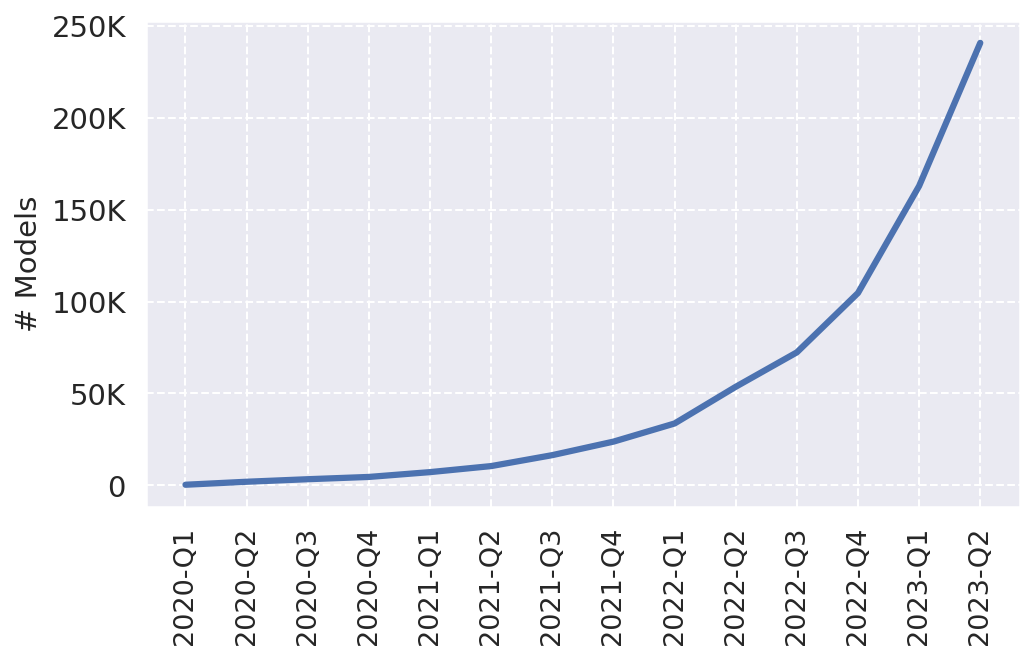

In [193]:

fig, ax = plt.subplots(figsize=(7, 4.5), dpi=150)
plt.rcParams['font.size'] = 10
p_dt = df.groupby(by=df["first_commit"].dt.to_period('Q')).count()['first_commit'].cumsum()['2020-01-01':'2023-06-01']
#ax = P_dt.plot(kind="line" ,ax=ax, lw=3)
plt.plot(p_dt.index.astype(str).str.replace('Q', '-Q'), p_dt , linewidth=3)
#ax.set_xlabel('Number of models hosted on HF each year', fontsize=14, labelpad=14)
ax.set_ylabel('# Models', fontsize=14)
ax.tick_params(axis='x', which='major', labelsize=13)
ax.tick_params(axis='y', which='major', labelsize=14)
#ax.tick_params(axis='both', which='major', labelsize=14)

labels = [f'{item.get_position()[1]/1e3:.0f}K' for item in ax.get_yticklabels()]
labels[0] = '0'
labels[1] = '0'
ax.set_yticklabels(labels)

#ax.set_xticklabels(df.index)
#labels = [item.get_text().replace('(', '').replace(')', '').replace(',', '\n').replace(' ','') for item in ax.get_xticklabels()]
#ax.set_xticklabels(labels)
#ax.xaxis.set_major_locator(mdates.MonthLocator((1,4,7,10)))
# you can change the format of the label (now it is 2016-Jan)  
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

#ax.set_xticks(p_dt.index.astype(str).str.replace('Q', '-Q'))
plt.xticks(rotation=90)
plt.grid('True', linestyle='dashed')
plt.tight_layout()

plt.savefig('trend_plot.svg', format='svg', dpi=3800)
plt.show()

In [ ]:
print( df.groupby(['name', 'day']).sum() \
         .groupby(level=0).cumsum() )

In [175]:
df.groupby(by=df["first_commit"].dt.to_period('Q')).sum()['repo_size'].cumsum()/1e12

/tmp/ipykernel_226686/2795035099.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df.groupby(by=df["first_commit"].dt.to_period('Q')).sum()['repo_size'].cumsum()/1e12
/tmp/ipykernel_226686/2795035099.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by=df["first_commit"].dt.to_period('Q')).sum()['repo_size'].cumsum()/1e12


first_commit
2014Q3    2.895100e-08
2016Q3    6.994365e-04
2017Q2    6.996443e-04
2017Q3    7.980874e-04
2018Q4    3.131989e-02
2019Q1    5.479602e-02
2019Q2    9.760637e-02
2019Q3    1.801800e-01
2019Q4    5.020461e-01
2020Q1    8.400924e-01
2020Q2    2.064829e+00
2020Q3    3.584966e+00
2020Q4    6.589272e+00
2021Q1    1.011410e+01
2021Q2    1.365209e+01
2021Q3    1.853800e+01
2021Q4    2.441346e+01
2022Q1    3.394088e+01
2022Q2    5.178802e+01
2022Q3    7.950785e+01
2022Q4    1.476830e+02
2023Q1    2.816619e+02
2023Q2    5.271163e+02
2023Q3    5.523800e+02
Freq: Q-DEC, Name: repo_size, dtype: float64

In [176]:
5.523800e+02

552.38

/tmp/ipykernel_226686/3006002748.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  p_dt = df.groupby(by=df["first_commit"].dt.to_period('Q')).sum()['repo_size'].cumsum()/1e12
/tmp/ipykernel_226686/3006002748.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  p_dt = df.groupby(by=df["first_commit"].dt.to_period('Q')).sum()['repo_size'].cumsum()/1e12
/tmp/ipykernel_226686/3006002748.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


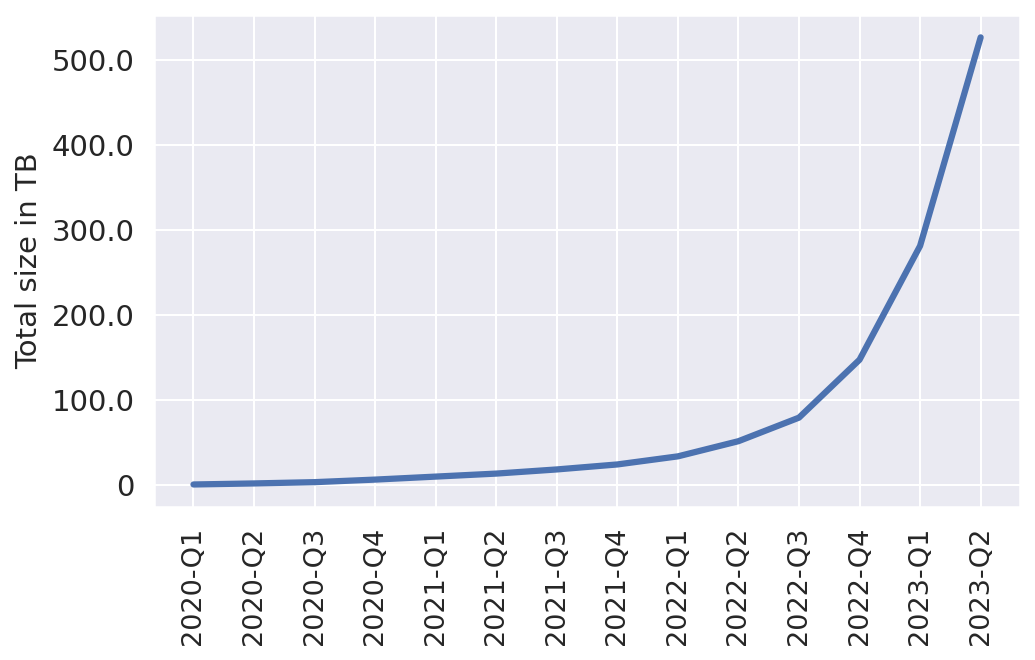

In [205]:

fig, ax = plt.subplots(figsize=(7, 4.5), dpi=150)
plt.rcParams['font.size'] = 10
p_dt = df.groupby(by=df["first_commit"].dt.to_period('Q')).sum()['repo_size'].cumsum()/1e12
p_dt = p_dt['2020-01-01':'2023-06-1']
#ax = P_dt.plot(kind="line" ,ax=ax, lw=3)
plt.plot(p_dt.index.astype(str).str.replace('Q', '-Q'), p_dt , linewidth=3)
#ax.set_xlabel('Number of models hosted on HF each year', fontsize=14, labelpad=14)
ax.set_ylabel('Total size in TB', fontsize=14)
ax.tick_params(axis='x', which='major', labelsize=13)
ax.tick_params(axis='y', which='major', labelsize=14)
#ax.tick_params(axis='both', which='major', labelsize=14)

labels = [f'{item.get_position()[1]}' for item in ax.get_yticklabels()]
labels[0] = '0'
labels[1] = '0'
ax.set_yticklabels(labels)

#ax.set_xticklabels(df.index)
#labels = [item.get_text().replace('(', '').replace(')', '').replace(',', '\n').replace(' ','') for item in ax.get_xticklabels()]
#ax.set_xticklabels(labels)
#ax.xaxis.set_major_locator(mdates.MonthLocator((1,4,7,10)))
# you can change the format of the label (now it is 2016-Jan)  
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

#ax.set_xticks(p_dt.index.astype(str).str.replace('Q', '-Q'))

plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('repo_size_trend_plot.svg', format='svg', dpi=3800)
plt.show()

In [197]:
p_dt.index.astype(str).str.replace('Q', '-Q')

Index(['2020-Q1', '2020-Q2', '2020-Q3', '2020-Q4', '2021-Q1', '2021-Q2',
       '2021-Q3', '2021-Q4', '2022-Q1', '2022-Q2', '2022-Q3', '2022-Q4',
       '2023-Q1', '2023-Q2'],
      dtype='object', name='first_commit')

/tmp/ipykernel_226686/3764228837.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  p_dt = df.groupby(by=df["first_commit"].dt.to_period('Q')).count()['first_commit'].cumsum()['2020-01-01':'2023-06-01']
/tmp/ipykernel_226686/3764228837.py:12: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  p_dt = df.groupby(by=df["first_commit"].dt.to_period('Q')).sum()['repo_size'].cumsum()/1e12
/tmp/ipykernel_226686/3764228837.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  p_dt = df.groupby(by=df["first_commit"].dt.to_period('Q')).sum()['repo_size'].cumsum()/1e12
/tmp/ipykernel_226686/3764228837.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)
/tmp/ipy

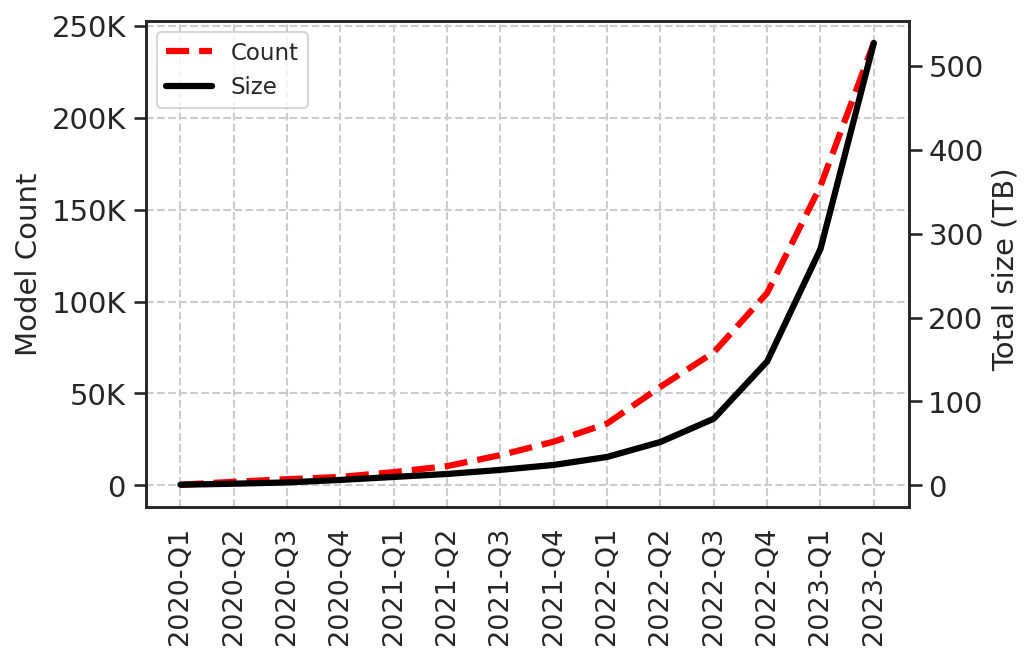

In [239]:
fig, ax = plt.subplots(figsize=(7, 4.5), dpi=150)
plt.rcParams['font.size'] = 10
p_dt = df.groupby(by=df["first_commit"].dt.to_period('Q')).count()['first_commit'].cumsum()['2020-01-01':'2023-06-01']
#ax = p_dt.plot(kind="line" ,ax=ax, lw=3)
ln1 = ax.plot(p_dt.index.astype(str).str.replace('Q', '-Q'), p_dt , linewidth=3, color='red', label = 'Count', linestyle='dashed') 
#ax.set_xlabel('Number of models hosted on HF each year', fontsize=14, labelpad=14)


ax.tick_params(axis='y', which='major', labelsize=14)
#ax.tick_params(axis='both', which='major', labelsize=14)
ax2 = ax.twinx()
p_dt = df.groupby(by=df["first_commit"].dt.to_period('Q')).sum()['repo_size'].cumsum()/1e12
p_dt = p_dt['2020-01-01':'2023-06-1']
ln2 = ax2.plot(p_dt.index.astype(str).str.replace('Q', '-Q'), p_dt , linewidth=3, color='black', label='Size')
ax2.set_ylabel('Total size (TB) ', fontsize=14)
ax2.tick_params(axis='y', which='major', labelsize=14)
labels = [f'{item.get_position()[1]/1e3:.0f}K' for item in ax.get_yticklabels()]
labels[0] = '0'
labels[1] = '0'
ax.set_yticklabels(labels)

ax.set_ylabel('Model Count', fontsize=14)
#ax.set_xticklabels([])
ax.set_xticklabels(p_dt.index.astype(str).str.replace('Q', '-Q'), rotation=90)
ax.tick_params(axis='x', which='major', labelsize=13)
plt.tight_layout()
lns = ln1+ln2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
ax.grid(True, linestyle='dashed')
plt.savefig('repo_size_trend_plot.svg', format='svg', dpi=3800)
plt.show()

In [128]:
p_dt.index

PeriodIndex(['2017Q2', '2017Q3', '2018Q4', '2019Q1', '2019Q2', '2019Q3',
             '2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4', '2021Q1',
             '2021Q2', '2021Q3', '2021Q4', '2022Q1', '2022Q2', '2022Q3',
             '2022Q4', '2023Q1', '2023Q2', '2023Q3'],
            dtype='period[Q-DEC]', name='first_commit')

In [366]:
p_dt = pd.Series(np.ones(len(df['first_commit'])))
p_dt.index = df['first_commit']


In [432]:
%matplotlib widget

In [102]:

p_dt = pd.Series(np.ones(len(df['first_commit'])))
p_dt.index = df['first_commit']
p_dt.sort_index().cumsum()['2019-01-01':'2023-07-09']

first_commit
2019-01-08 15:40:22+00:00        15.0
2019-01-08 15:40:22+00:00        16.0
2019-02-06 15:11:13+00:00        17.0
2019-02-18 10:36:15+00:00        18.0
2019-02-18 10:36:15+00:00        19.0
                               ...   
2023-07-09 13:17:34+00:00    249179.0
2023-07-09 13:28:43+00:00    249180.0
2023-07-09 13:33:01+00:00    249181.0
2023-07-09 15:46:54+00:00    249182.0
2023-07-09 17:37:38+00:00    249183.0
Length: 249169, dtype: float64

In [104]:
import matplotlib.ticker as ticker

/tmp/ipykernel_215202/2059341592.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


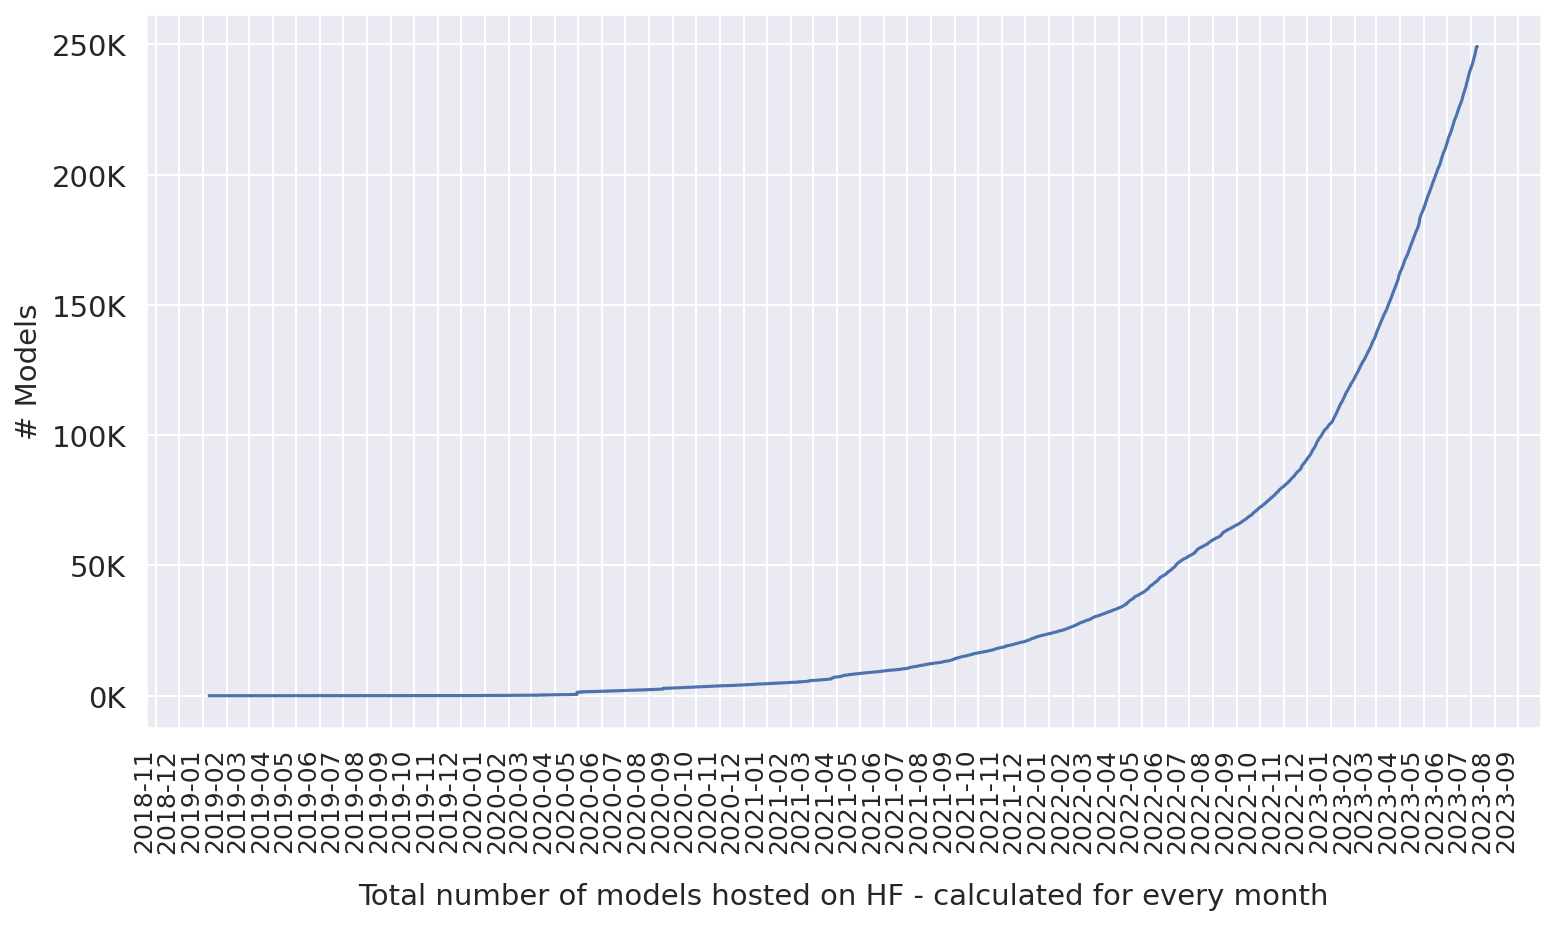

In [109]:
fig, ax = plt.subplots(figsize=(12, 7), dpi=150)
p_dt = pd.Series(np.ones(len(df['first_commit'])))
p_dt.index = df['first_commit']
#p_dt.index = pd.DatetimeIndex([datetime.datetime.strftime(x, '%Y-%m') for x in p_dt.index])
plt.rcParams['font.size'] = 10

ax= p_dt.sort_index().cumsum()['2019-01-01':'2023-07-09'].plot(x_compat=True, ax=ax)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(fontsize=5, rotation=90)
ax.set_ylabel('# Models', fontsize=14)
ax.tick_params(axis='x', which='major', labelsize=12)
ax.tick_params(axis='y', which='major', labelsize=14)
labels = [f'{item.get_position()[1]/1e3:.0f}K' for item in ax.get_yticklabels()]
labels[0] = '0'
ax.set_yticklabels(labels)
ax.set_xlabel('Total number of models hosted on HF - calculated for every month', fontsize=14, labelpad=14)
ax.set_xticks([], minor=True)
plt.show()

In [78]:
ax.get_xticklabels()

[Text(-2.0, 0, '(2023, 2)'),
 Text(0.0, 0, '(2020, 1)'),
 Text(2.0, 0, '(2020, 3)'),
 Text(4.0, 0, '(2021, 1)'),
 Text(6.0, 0, '(2021, 3)'),
 Text(8.0, 0, '(2022, 1)'),
 Text(10.0, 0, '(2022, 3)'),
 Text(12.0, 0, '(2023, 1)'),
 Text(14.0, 0, '(2023, 3)'),
 Text(16.0, 0, '')]

TypeError: 'MonthLocator' object is not iterable

In [ ]:
['Q1', 'Q2', 'Q3', 'Q4', 'Q1', 'Q2', 'Q3','Q4', 'Q1', 'Q2', 'Q3','Q4', 'Q1', 'Q2', 'Q3','Q4', 'Q1', 'Q2', 'Q3']

In [60]:
ax.xaxis.get_minorticklabels()

[Text(17987.0, 0, 'Apr'),
 Text(18078.0, 0, 'Jul'),
 Text(18170.0, 0, 'Oct'),
 Text(18353.0, 0, 'Apr'),
 Text(18444.0, 0, 'Jul'),
 Text(18536.0, 0, 'Oct'),
 Text(18718.0, 0, 'Apr'),
 Text(18809.0, 0, 'Jul'),
 Text(18901.0, 0, 'Oct'),
 Text(19083.0, 0, 'Apr'),
 Text(19174.0, 0, 'Jul'),
 Text(19266.0, 0, 'Oct'),
 Text(19448.0, 0, 'Apr'),
 Text(19539.0, 0, 'Jul')]

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7), dpi=150)
p_dt = pd.Series(np.ones(len(df['first_commit'])))
p_dt.index = df['first_commit']
#p_dt.index = pd.DatetimeIndex([datetime.datetime.strftime(x, '%Y-%m') for x in p_dt.index])
plt.rcParams['font.size'] = 10

ax= p_dt.sort_index().cumsum()['2019-01-01':'2023-07-09'].plot(x_compat=True, ax=ax)

years = mdates.MonthLocator(interval=3)


plt.xticks(fontsize=5, rotation=0)
ax.set_ylabel('# Models', fontsize=14)
ax.tick_params(axis='x', which='both', labelsize=12)
ax.tick_params(axis='y', which='major', labelsize=14)
labels = [f'{item.get_position()[1]/1e3:.0f}K' for item in ax.get_yticklabels()]
labels[0] = '0'
ax.set_yticklabels(labels)
ax.set_xlabel('Total number of models hosted on HF - calculated for every month', fontsize=14, labelpad=14)
plt.show()

/tmp/ipykernel_226686/9779664.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


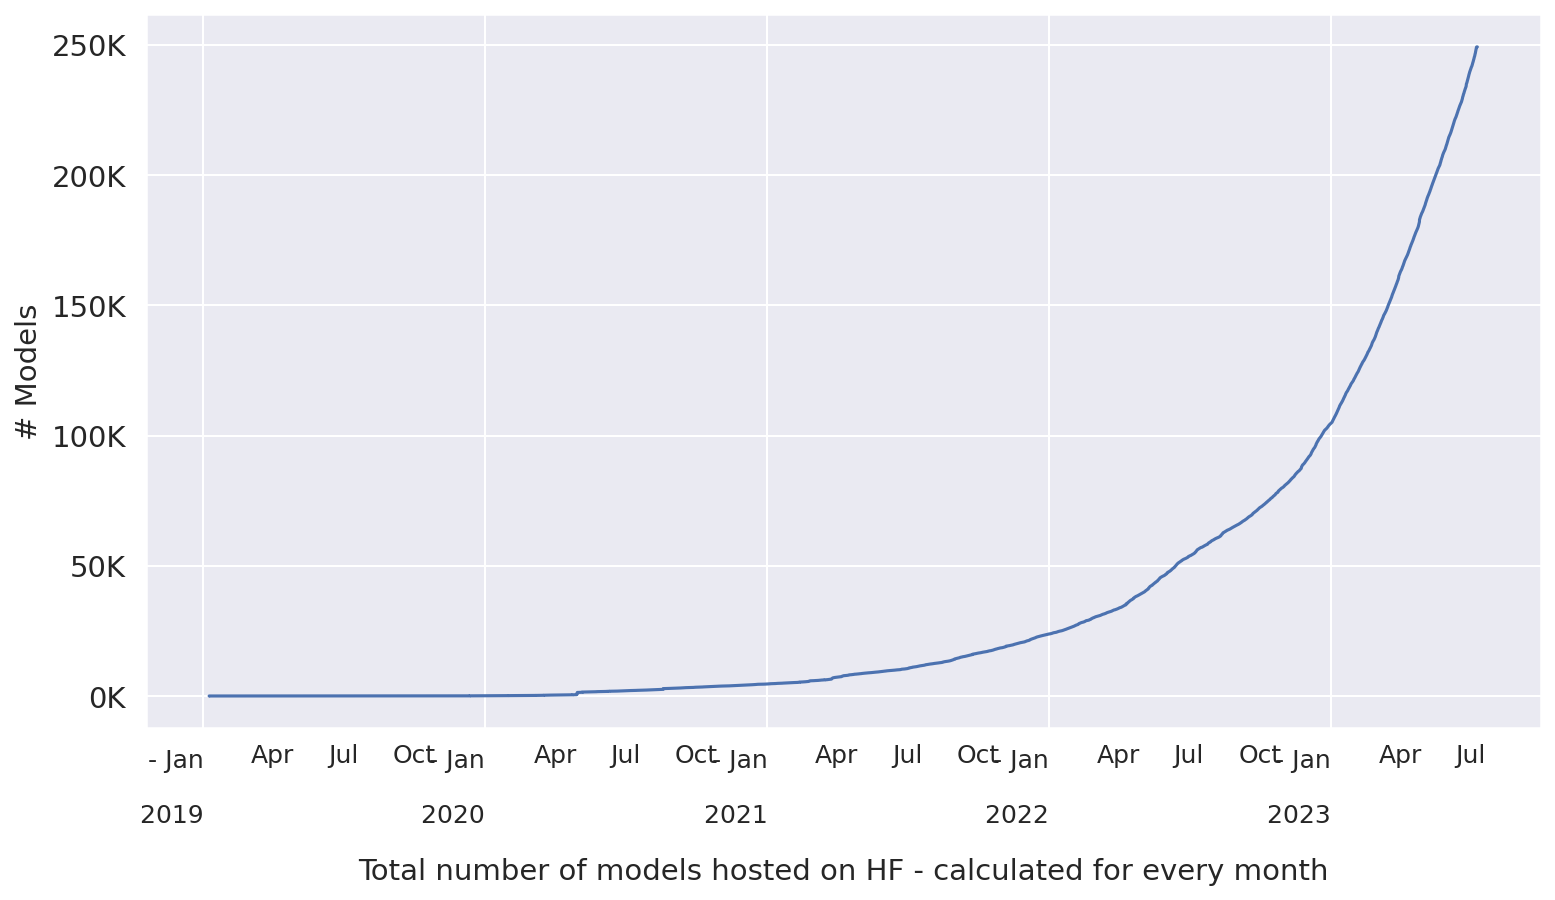

In [68]:
fig, ax = plt.subplots(figsize=(12, 7), dpi=150)
p_dt = pd.Series(np.ones(len(df['first_commit'])))
p_dt.index = df['first_commit']
#p_dt.index = pd.DatetimeIndex([datetime.datetime.strftime(x, '%Y-%m') for x in p_dt.index])
plt.rcParams['font.size'] = 10

ax= p_dt.sort_index().cumsum()['2019-01-01':'2023-07-09'].plot(x_compat=True, ax=ax)
#ticklabels = [item.strftime('%Y-%m') for item in df.index]
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
# loc = mdates.MonthLocator((1,4,7,10))
# ax.xaxis.set_major_locator(loc)
# fmt = mdates.DateFormatter('%b\n%Y')
# ax.xaxis.set_major_formatter(fmt)
# plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

years = mdates.YearLocator()
months = mdates.MonthLocator((1,4,7,10))
monthsFmt = mdates.DateFormatter('%b') 
yearsFmt = mdates.DateFormatter('%b\n\n%Y')  # add some space for the year label
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(monthsFmt)

#ax.set_xticks(major_xticks)
#ax.set_xticks(['Q1', 'Q2', 'Q3', 'Q4', 'Q1', 'Q2', 'Q3','Q4', 'Q1', 'Q2', 'Q3','Q4', 'Q1', 'Q2', 'Q3','Q4', 'Q1', 'Q2', 'Q3'], minor = True)

#plt.setp(ax.xaxis.get_minorticklabels(), rotation=90)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)

plt.xticks(fontsize=5, rotation=0)
ax.set_ylabel('# Models', fontsize=14)
ax.tick_params(axis='x', which='both', labelsize=12)
ax.tick_params(axis='y', which='major', labelsize=14)
labels = [f'{item.get_position()[1]/1e3:.0f}K' for item in ax.get_yticklabels()]
labels[0] = '0'
ax.set_yticklabels(labels)
ax.set_xlabel('Total number of models hosted on HF - calculated for every month', fontsize=14, labelpad=14)
plt.show()

In [243]:
p_dt.sort_index().cumsum()['2019-01-01':'2023-07-09']

first_commit
2019-01-08 15:40:22+00:00        15.0
2019-01-08 15:40:22+00:00        16.0
2019-02-06 15:11:13+00:00        17.0
2019-02-18 10:36:15+00:00        18.0
2019-02-18 10:36:15+00:00        19.0
                               ...   
2023-07-09 13:17:34+00:00    249179.0
2023-07-09 13:28:43+00:00    249180.0
2023-07-09 13:33:01+00:00    249181.0
2023-07-09 15:46:54+00:00    249182.0
2023-07-09 17:37:38+00:00    249183.0
Length: 249169, dtype: float64

<Axes: xlabel='first_commit'>

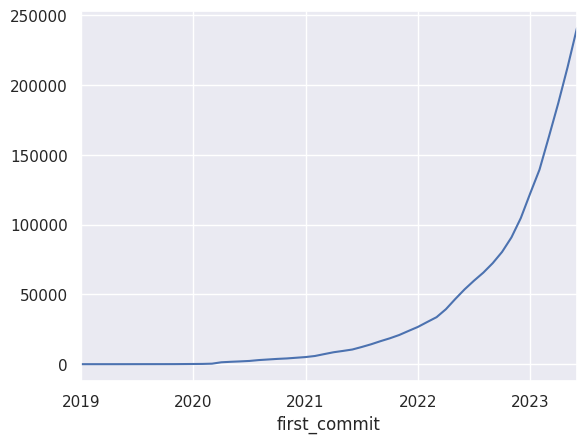

In [297]:
p_dt.plot(kind='line')

In [385]:
p_dt = pd.Series(np.ones(len(df['first_commit'])))
p_dt.index = df['first_commit']
p_dt = p_dt.resample('1M').sum().cumsum()
p_dt.index = [i.date() for i in p_dt.index]

In [389]:
p_dt.index[0]

datetime.date(2014, 8, 31)

In [349]:
p_dt = p_dt['2019-01-01':'2023-08-01']
p_dt.index[0]

Timestamp('2019-01-31 00:00:00')

In [393]:
p_dt = pd.Series(np.ones(len(df['first_commit'])))
p_dt.index = df['first_commit']
p_dt = p_dt.resample('1M').sum().cumsum()
p_dt.index = pd.DatetimeIndex([i.date() for i in p_dt.index])

In [395]:
p_dt.index[0]

Timestamp('2014-08-31 00:00:00')

In [396]:
p_dt = pd.Series(np.ones(len(df['first_commit'])))
p_dt.index = df['first_commit']
p_dt.index

DatetimeIndex(['2019-12-20 12:28:51+00:00', '2019-11-04 16:00:52+00:00',
               '2019-12-20 12:28:51+00:00', '2019-11-04 16:00:53+00:00',
               '2019-12-20 12:28:51+00:00', '2019-11-04 16:00:53+00:00',
               '2019-12-20 12:28:51+00:00', '2019-11-04 16:00:52+00:00',
               '2019-06-18 21:02:17+00:00', '2018-11-14 23:35:08+00:00',
               ...
               '2023-07-08 17:26:25+00:00', '2023-07-08 17:26:44+00:00',
               '2023-07-08 17:26:52+00:00', '2023-07-08 17:27:30+00:00',
               '2023-07-08 17:28:27+00:00', '2023-07-08 17:30:25+00:00',
               '2023-07-08 17:31:45+00:00', '2023-07-08 17:34:18+00:00',
               '2023-07-08 17:36:14+00:00', '2023-07-08 17:37:36+00:00'],
              dtype='datetime64[ns, UTC]', name='first_commit', length=249183, freq=None)

In [429]:
p_dt = pd.Series(np.ones(len(df['first_commit'])))
p_dt.index = df['first_commit']
p_dt = p_dt.resample('1M').sum().cumsum()
p_dt.index = pd.DatetimeIndex([i.date() for i in p_dt.index], )
p_dt = p_dt['2017-01-01':'2023-08-01']


In [423]:
p_dt = pd.Series(np.ones(len(df['first_commit'])))
p_dt.index = df['first_commit']
p_dt = p_dt.resample('1M').sum().cumsum()

In [431]:
str(p_dt.index[0])

'2017-01-31 00:00:00'

In [420]:
p_dt.index[0]

Timestamp('2017-01-31 00:00:00')

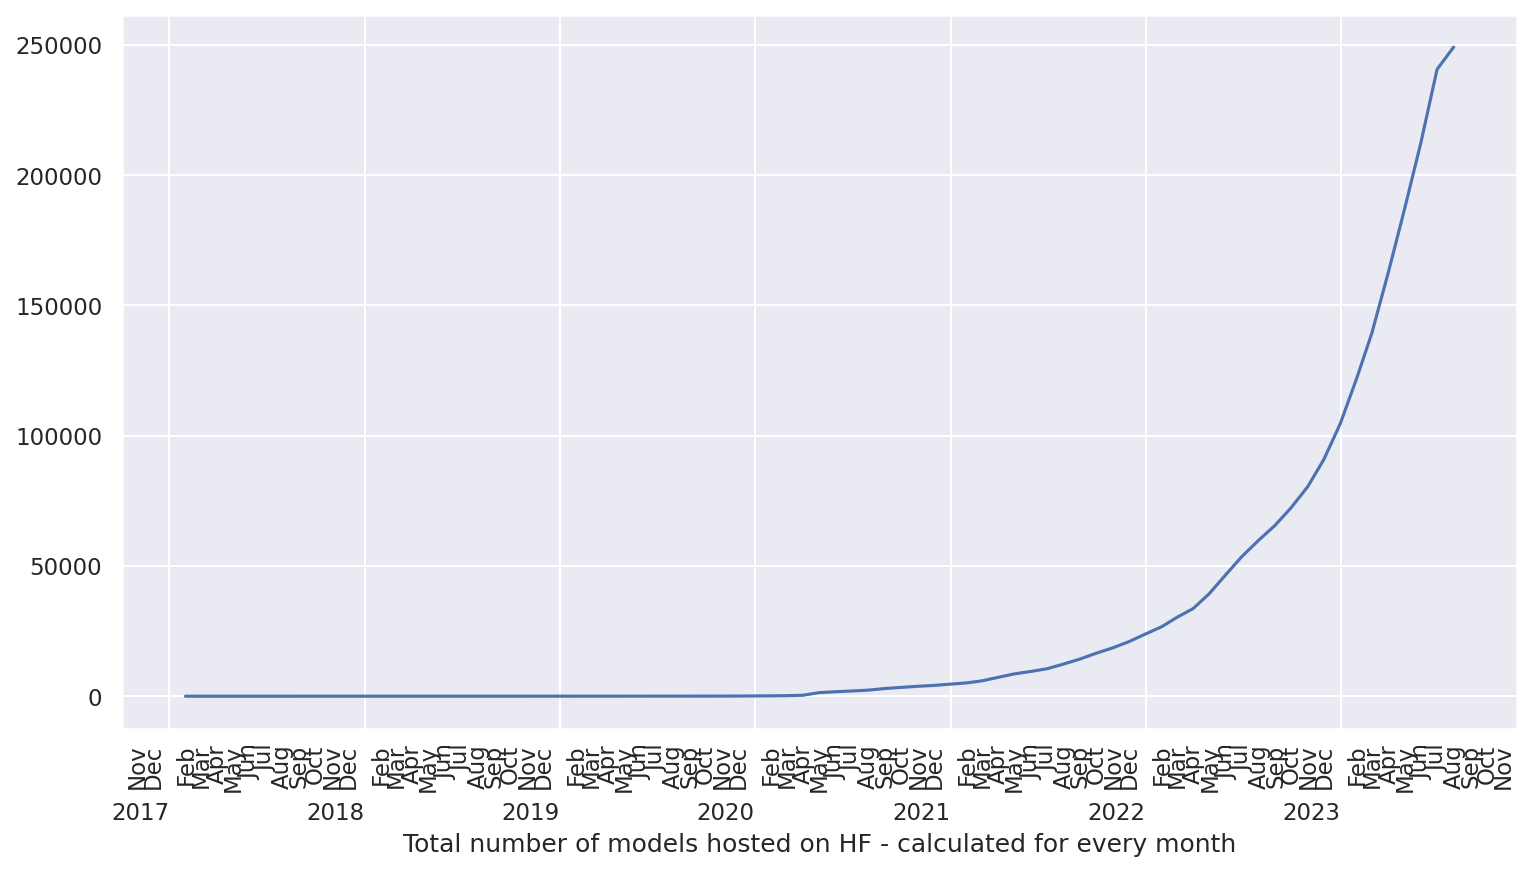

In [417]:
p_dt = pd.Series(np.ones(len(df['first_commit'])))
p_dt.index = df['first_commit']
p_dt = p_dt.resample('1M').sum().cumsum()
p_dt.index = pd.DatetimeIndex([i.date() for i in p_dt.index])
p_dt = p_dt['2017-01-01':'2023-08-01']




fig, ax = plt.subplots(figsize=(12, 7), dpi=150)


ax = p_dt.plot(ax=ax, x_compat=True)
#plt.plot(p_dt.index, p_dt)
#plt.show()

years = mdates.YearLocator()
months = mdates.MonthLocator(interval=1)
monthsFmt = mdates.DateFormatter('%b') 
yearsFmt = mdates.DateFormatter('\n\n%Y')  # add some space for the year label
ax.set_xlabel('Total number of models hosted on HF - calculated for every month')
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(monthsFmt)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=90)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
#fig.tight_layout()
plt.show()
#ax.xaxis.get_minorticklabels()

In [126]:
p_dt.index.month

Int64Index([12, 11, 12, 11, 12, 11, 12, 11,  6, 11,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='first_commit', length=94166)

<Axes: xlabel='first_commit,first_commit'>

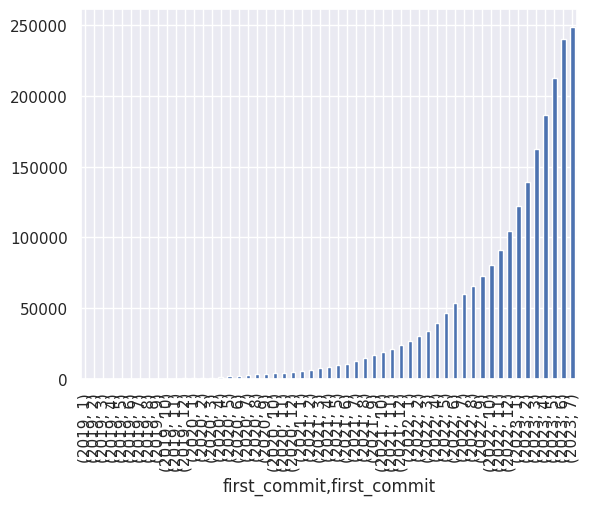

In [310]:
p_dt.groupby([p_dt.index.year, p_dt.index.month]).sum().plot(kind='bar')

/tmp/ipykernel_91049/4195671167.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax= df.groupby([df["first_commit"].dt.year, df["first_commit"].dt.month]).cumsum().plot(kind="bar")


KeyboardInterrupt: 

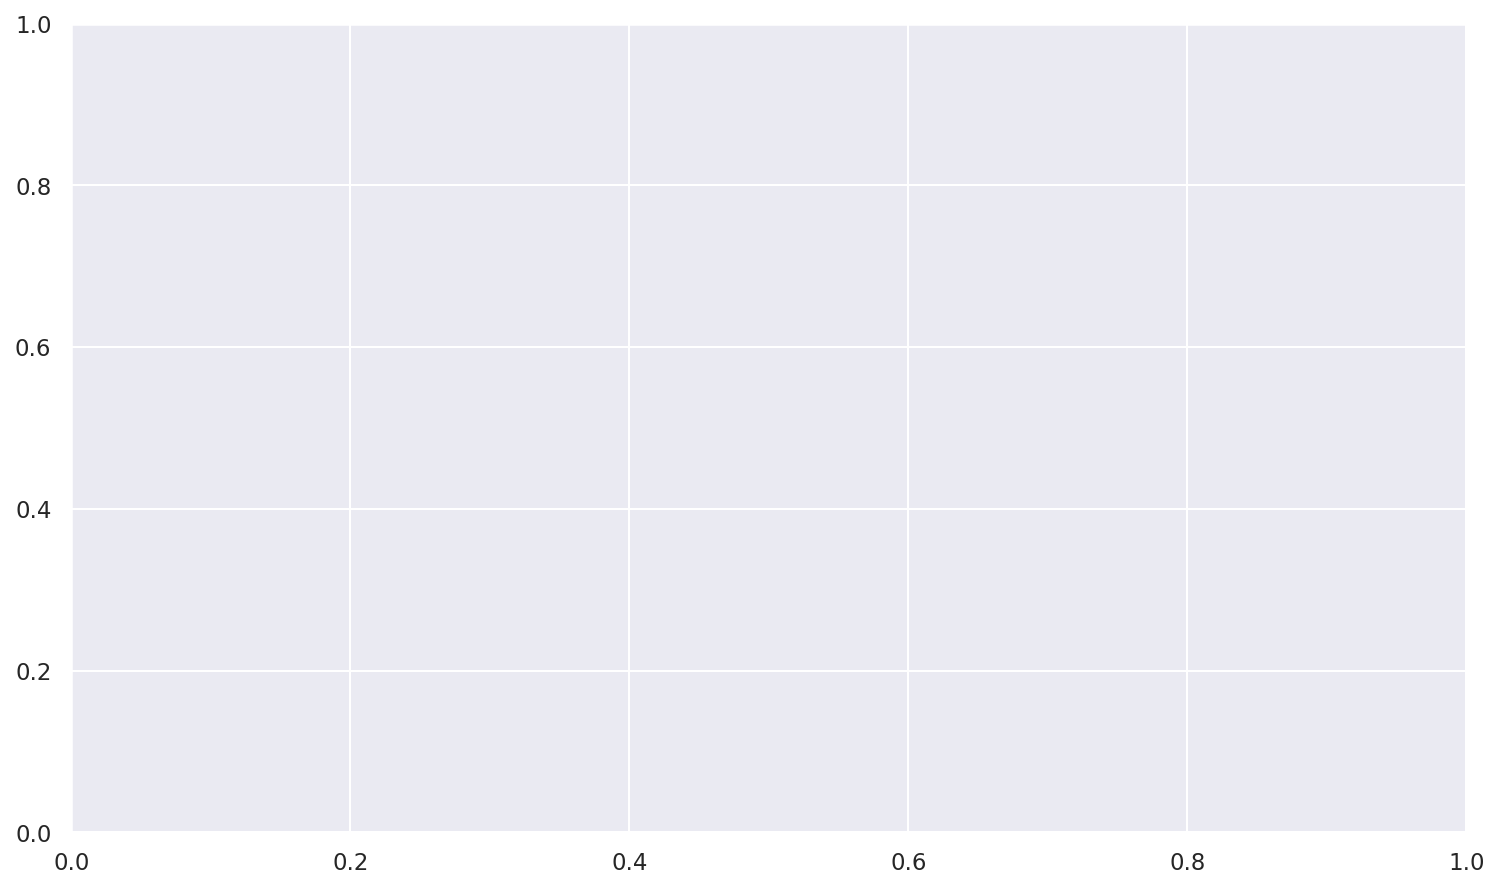

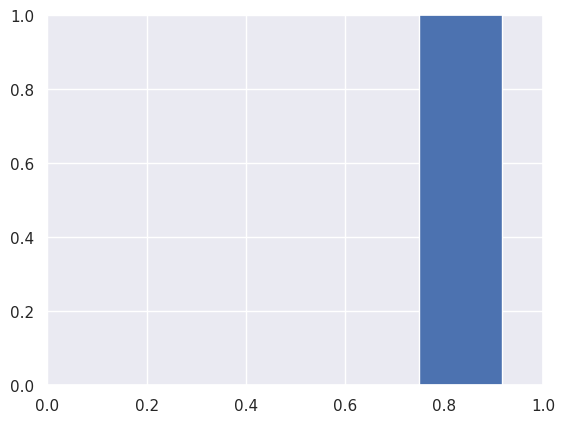

In [119]:
p_dt = pd.Series(np.ones(len(df['first_commit'])))
p_dt.index = df['first_commit']

fig, ax = plt.subplots(figsize=(12, 7), dpi=150)

ax= df.groupby([df["first_commit"].dt.year, df["first_commit"].dt.month]).cumsum(numeric_only=True).plot(kind="bar")
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))

# calculate % increase 

<Axes: xlabel='num_downloads', ylabel='Count'>

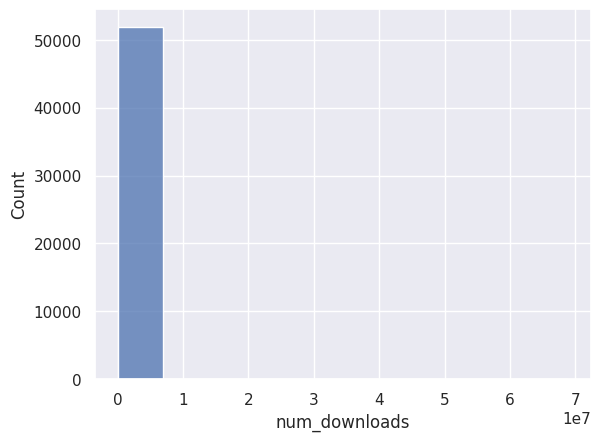

In [17]:
sns.histplot(data=df['num_downloads'], bins = 10)

<Axes: ylabel='Frequency'>

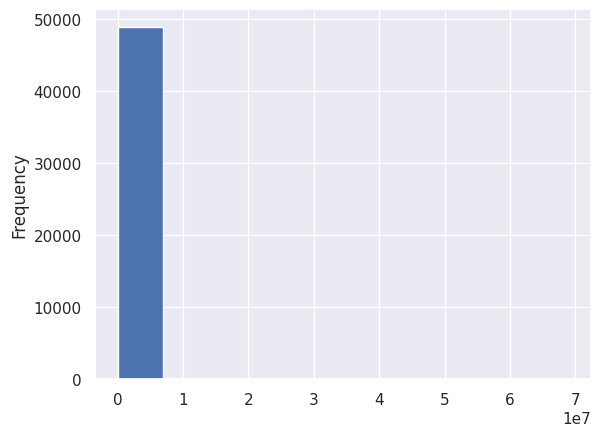

In [4]:
df['num_downloads'].plot(kind='hist')

In [ ]:
ax = sns.ecdfplot(df['num_downloads'])
ax.tick_params(axis='both', which='both', labelsize=10)

In [123]:
idx = 876
c = data[idx]['repo_info']
b = data[idx]['commit_info']

In [131]:
info

{'repo_info': None,
 'commit_info': None,
 'status': huggingface_hub.utils._errors.RepositoryNotFoundError('404 Client Error. (Request ID: Root=1-64a99fb9-25da9ff54390d7385f5174b8)\n\nRepository Not Found for url: https://huggingface.co/api/models/Anorak/nirvana?blobs=True.\nPlease make sure you specified the correct `repo_id` and `repo_type`.\nIf you are trying to access a private or gated repo, make sure you are authenticated.')}

In [48]:
df.iloc[-1]['repo_size']/1e6

58.584024

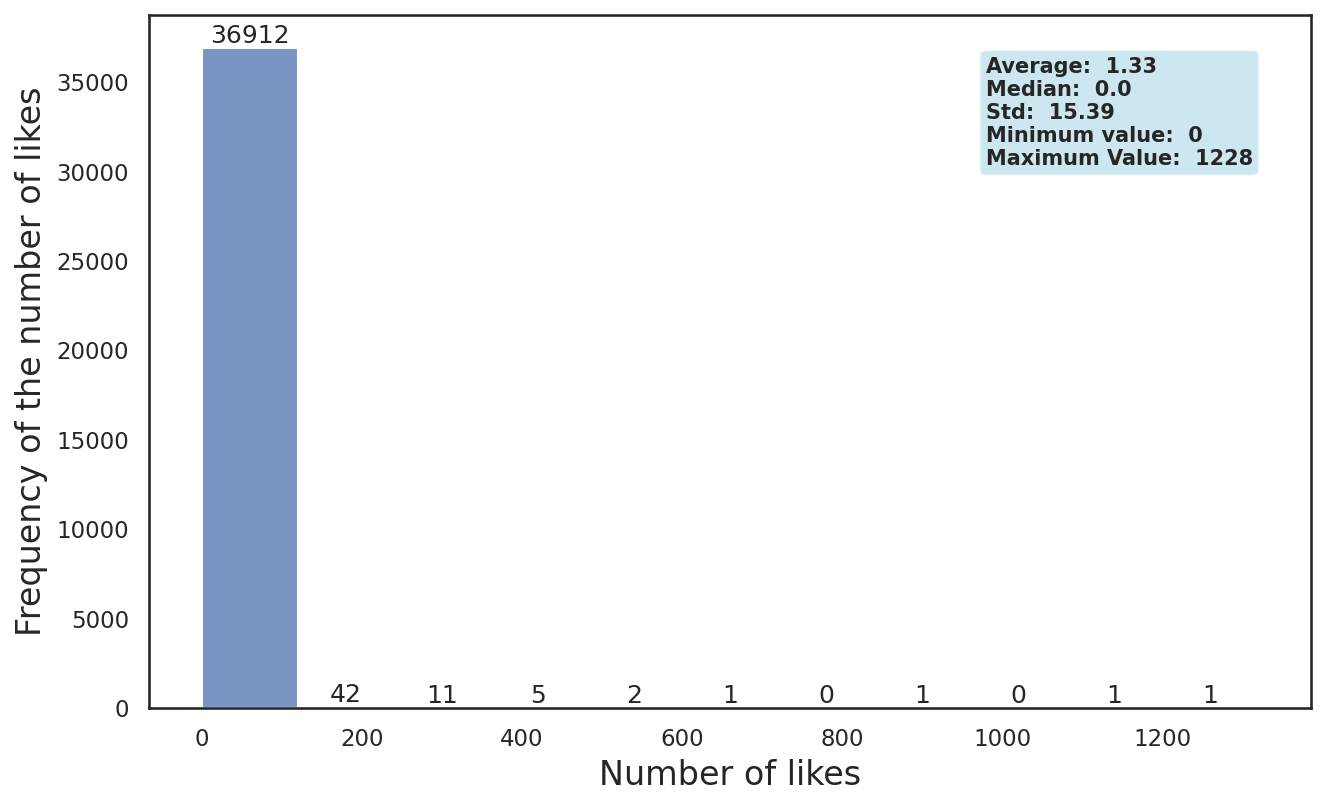

In [28]:
plot_data(df['likes'], 'Number of likes', 'Frequency of the number of likes', bins=5)
plt.show()

In [149]:
df['num_downloads'].describe()

count    26980.000000
mean         1.523573
std         17.386596
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1228.000000
Name: likes, dtype: float64

,likes,num_downloads,repo_id,model_id,repo_size,author,pipeline_tag,tags,first_commit,last_modified,commit_history
0,2,48115,albert-base-v1,albert-base-v1,222929984,None,fill-mask,"[pytorch, tf, safetensors, albert, fill-mask, ...",2019-12-20 12:28:51+00:00,2023-04-06 13:42:57+00:00,"[2019-12-20 12:28:51+00:00, 2019-12-20 12:28:5..."
1,52,6145692,albert-base-v2,albert-base-v2,330556062,None,fill-mask,"[pytorch, tf, jax, rust, safetensors, albert, ...",2019-11-04 16:00:52+00:00,2023-05-30 07:52:10+00:00,"[2019-11-04 16:00:52+00:00, 2019-11-04 16:00:5..."
2,0,636,albert-large-v1,albert-large-v1,248038110,None,fill-mask,"[pytorch, tf, albert, fill-mask, en, dataset:b...",2019-12-20 12:28:51+00:00,2021-01-13 15:29:06+00:00,"[2019-12-20 12:28:51+00:00, 2019-12-20 12:28:5..."
3,11,9316,albert-large-v2,albert-large-v2,319460794,None,fill-mask,"[pytorch, tf, safetensors, albert, fill-mask, ...",2019-11-04 16:00:53+00:00,2023-04-06 13:41:50+00:00,"[2019-11-04 16:00:53+00:00, 2019-11-04 16:00:5..."
4,0,466,albert-xlarge-v1,albert-xlarge-v1,742018829,None,fill-mask,"[pytorch, tf, albert, fill-mask, en, dataset:b...",2019-12-20 12:28:51+00:00,2021-01-13 15:30:39+00:00,"[2019-12-20 12:28:51+00:00, 2019-12-20 12:28:5..."
...,...,...,...,...,...,...,...,...,...,...,...
26975,3,9,shahukareem/wav2vec2-large-xlsr-53-dhivehi-v2,shahukareem/wav2vec2-large-xlsr-53-dhivehi-v2,1262151929,shahukareem,automatic-speech-recognition,"[pytorch, wav2vec2, automatic-speech-recogniti...",2021-08-08 19:05:45+00:00,2021-08-21 18:31:59+00:00,"[2021-08-08 19:05:45+00:00, 2021-08-08 20:51:3..."
26976,1,67,shahukareem/wav2vec2-large-xlsr-53-dhivehi,shahukareem/wav2vec2-large-xlsr-53-dhivehi,1262163174,shahukareem,automatic-speech-recognition,"[pytorch, wav2vec2, automatic-speech-recogniti...",2021-03-22 15:47:00+00:00,2021-03-28 08:47:31+00:00,"[2021-03-22 15:47:00+00:00, 2021-03-22 16:08:0..."
26977,0,8,shahukareem/wav2vec2-xls-r-1b-dv-with-lm-v2,shahukareem/wav2vec2-xls-r-1b-dv-with-lm-v2,8132982165,shahukareem,automatic-speech-recognition,"[pytorch, wav2vec2, automatic-speech-recogniti...",2022-02-18 22:25:11+00:00,2022-02-18 23:07:45+00:00,"[2022-02-18 22:25:11+00:00, 2022-02-18 23:07:4..."
26978,0,8,shahukareem/wav2vec2-xls-r-1b-dv-with-lm,shahukareem/wav2vec2-xls-r-1b-dv-with-lm,8132984436,shahukareem,automatic-speech-recognition,"[pytorch, wav2vec2, automatic-speech-recogniti...",2022-02-18 18:41:25+00:00,2022-02-19 04:02:40+00:00,"[2022-02-18 18:41:25+00:00, 2022-02-18 18:59:5..."


In [29]:
sum(i.size for i in c.siblings)

222929984

In [64]:
ax.containers[0]

<BarContainer object of 6 artists>

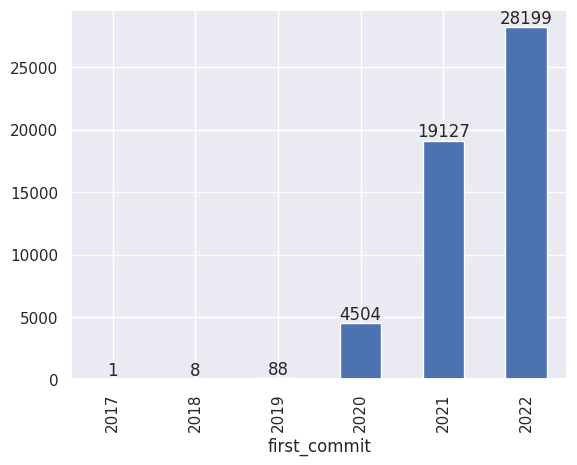

In [66]:
ax = df.groupby(df["first_commit"].dt.year).count()['first_commit'].plot(kind="bar")
ax.bar_label(ax.containers[0])
plt.show()

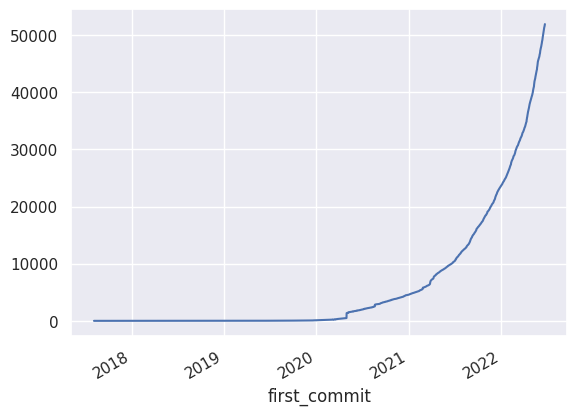

In [91]:
ax= p_dt.sort_index().cumsum().plot()


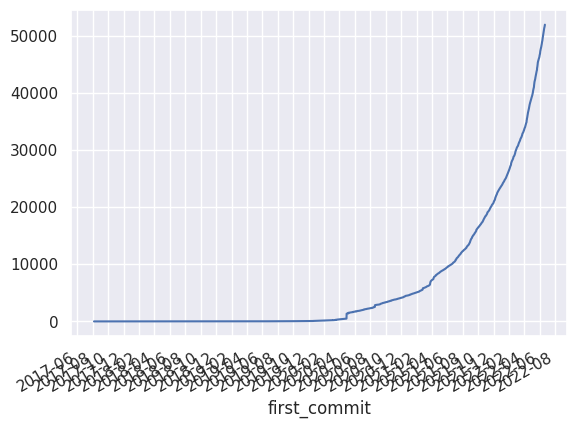

In [85]:
p_dt = pd.Series(np.ones(len(df['first_commit'])))
p_dt.index = df['first_commit']
p_dt.index = pd.PeriodIndex(df['first_commit'], freq='Q')

<Axes: xlabel='first_commit'>

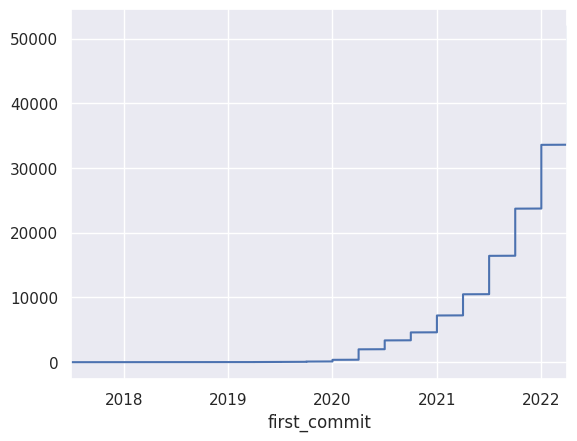

In [87]:
p_dt.sort_index().cumsum().plot()

In [130]:
from autoviz import AutoViz_Class

AV = AutoViz_Class()

In [141]:
dft = AV.AutoViz(
    "",
    sep=",",
    depVar="",
    dfte=df,
    header=0,
    verbose=1,
    lowess=False,
    chart_format="server",
    max_rows_analyzed=260000,
    max_cols_analyzed=30,
    save_plot_dir=None
)

Shape of your Data Set loaded: (249183, 11)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
first_commit of type=datetime64[ns, UTC] is not classified
No of columns classified 10 does not match 11 total cols. Continuing...
 Missing columns = ['first_commit']
        No variables removed since no ID or low-information variables found in data set
No scatter plots with depVar when no depVar is given.
pair_scatters can be found in URL below:
Launching server at http://localhost:41953
distplots can be found in URL below:
Launching server at http://localhost:44049
violinplots can be found in URL below:
Launching server at http://localhost:44383
No date vars could be found in data set
heatmaps can be found in URL below:
Launching server at http

In [37]:
df['pipeline_tag'].count()

138490

In [36]:
df['pipeline_tag'].count()/df.shape[0]

0.5557762768728204

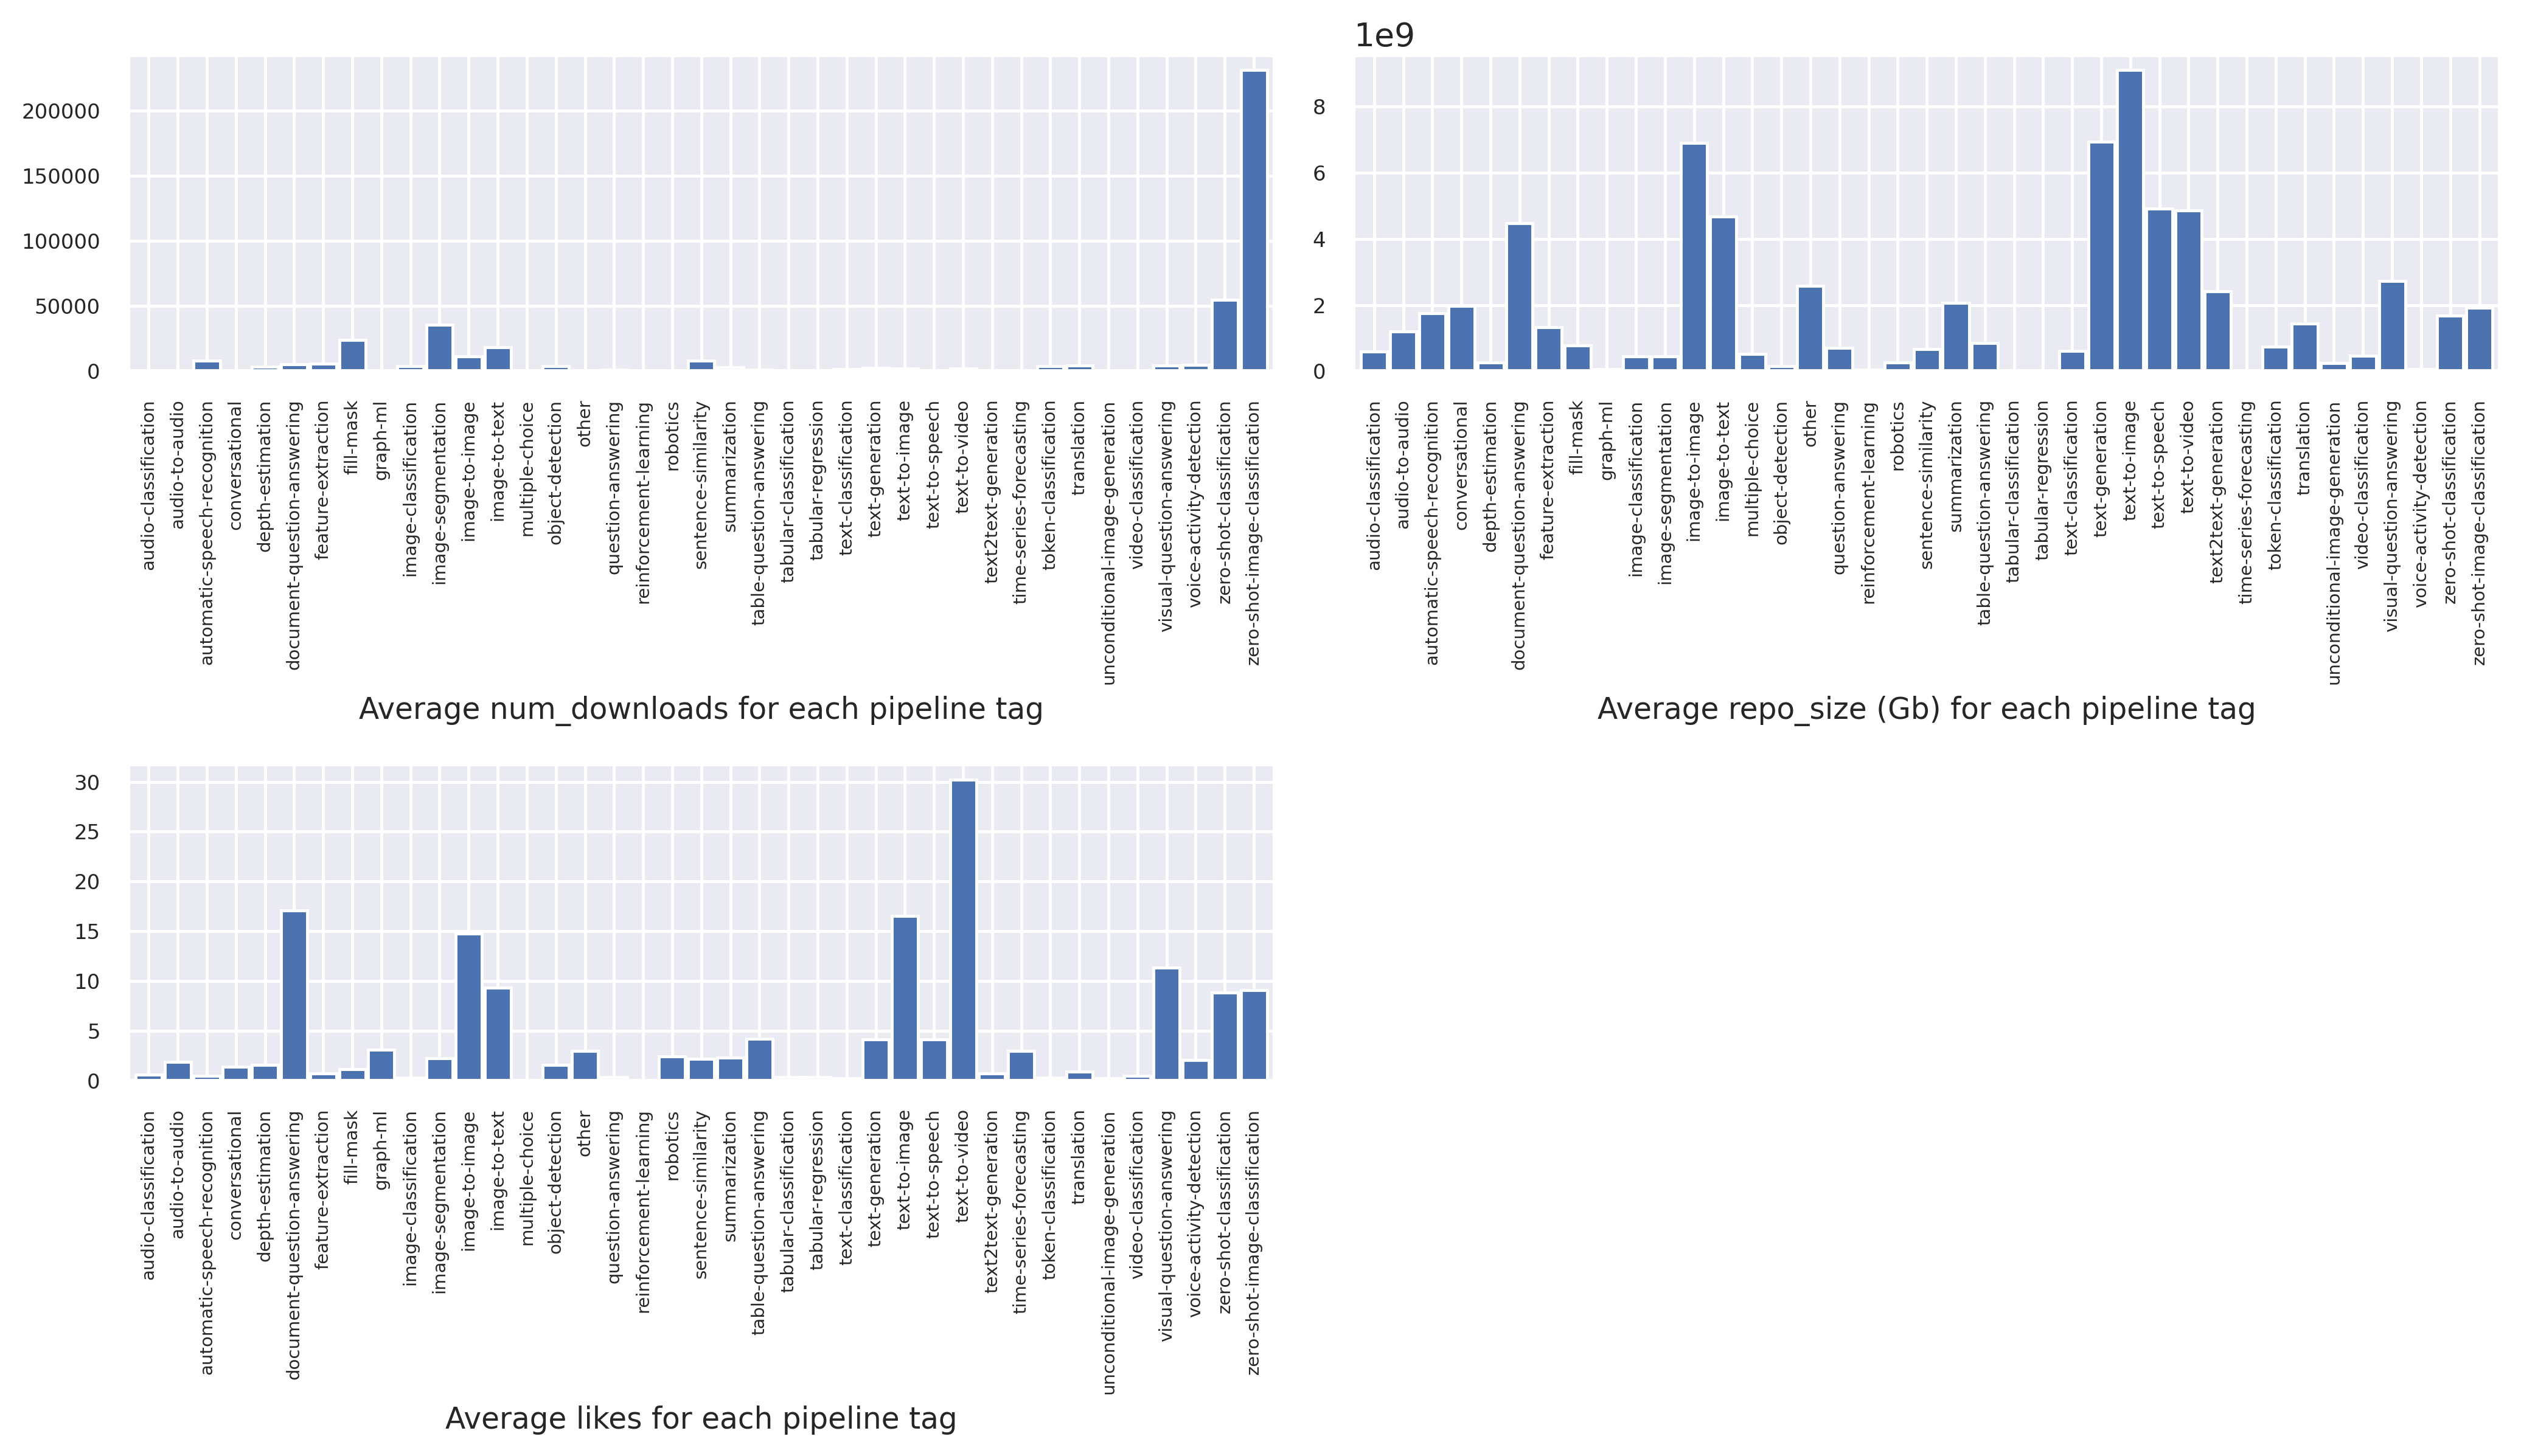

In [34]:
fig, axes = plt.subplots(figsize=(12, 7), dpi=350, nrows=2, ncols=2)
ax1=axes[0,0]
ax2=axes[0,1]
ax3=axes[1,0]
ax4=axes[1,1]

df.groupby('pipeline_tag')['num_downloads'].mean().plot(kind='bar', width=0.9, ax=ax1)
ax1.set_xlabel('Average num_downloads for each pipeline tag', fontsize=10)
ax1.tick_params(axis='x', which='major', labelsize=6)
ax1.tick_params(axis='y', which='major', labelsize=7)

df.groupby('pipeline_tag')['repo_size'].mean().plot(kind='bar', width=0.9, ax=ax2)
ax2.set_xlabel('Average repo_size (Gb) for each pipeline tag', fontsize=10)
ax2.tick_params(axis='x', which='major', labelsize=6)
ax2.tick_params(axis='y', which='major', labelsize=7)

df.groupby('pipeline_tag')['likes'].mean().plot(kind='bar', width=0.9, ax=ax3)
ax3.set_xlabel('Average likes for each pipeline tag', fontsize=10)
ax3.tick_params(axis='x', which='major', labelsize=6)
ax3.tick_params(axis='y', which='major', labelsize=7)

ax4.set_visible(False)

plt.tight_layout()
plt.show()

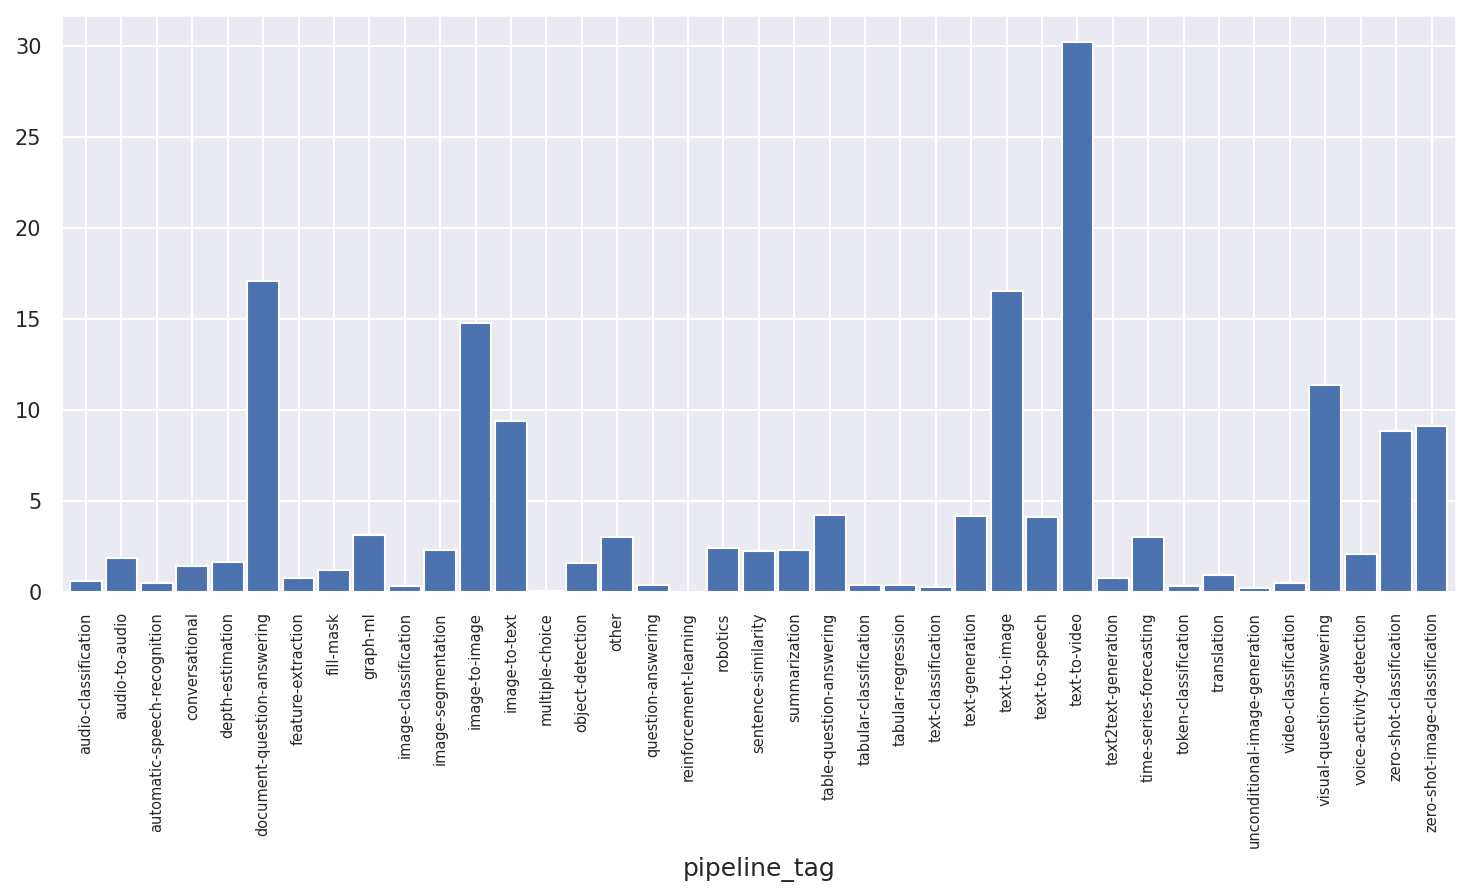

In [16]:
fig, axes = plt.subplots(figsize=(12, 5), dpi=150, nrows=2, ncols=2)
ax1=axes[0,0]
ax2=axes[0,1]
ax3=axes[1,0]
df.groupby('pipeline_tag')['likes'].mean().plot(kind='bar', width=0.9, ax=ax1)
ax1.tick_params(axis='x', which='major', labelsize=7)
ax1.tick_params(axis='y', which='major', labelsize=10)
plt.show()

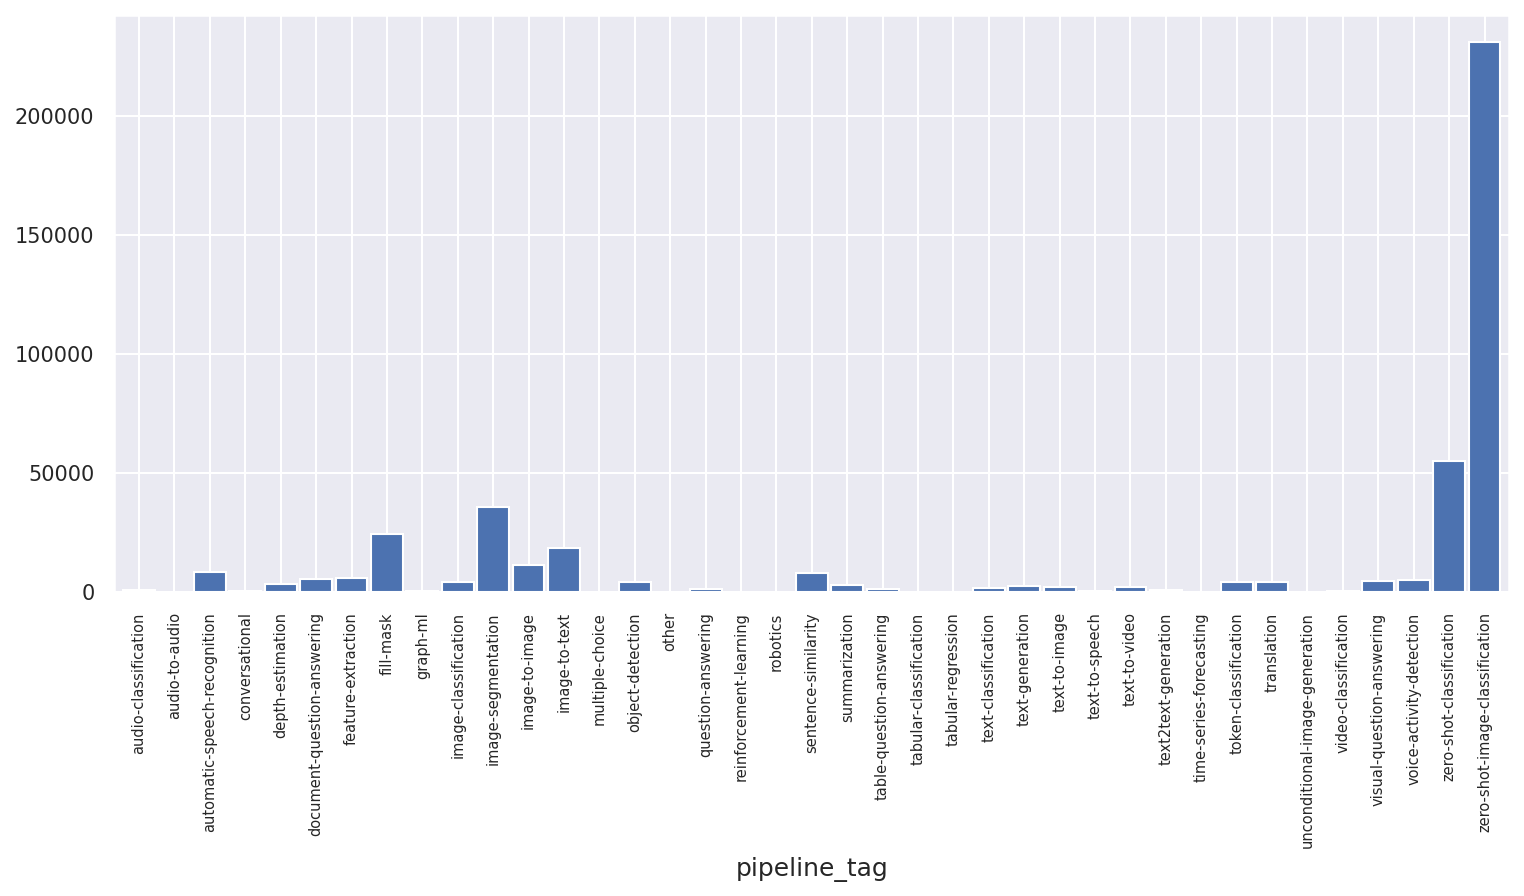

In [17]:
fig, ax = plt.subplots(figsize=(12, 5), dpi=150)
df.groupby('pipeline_tag')['num_downloads'].mean().plot(kind='bar', width=0.9)
ax.tick_params(axis='x', which='major', labelsize=7)
ax.tick_params(axis='y', which='major', labelsize=10)
plt.show()

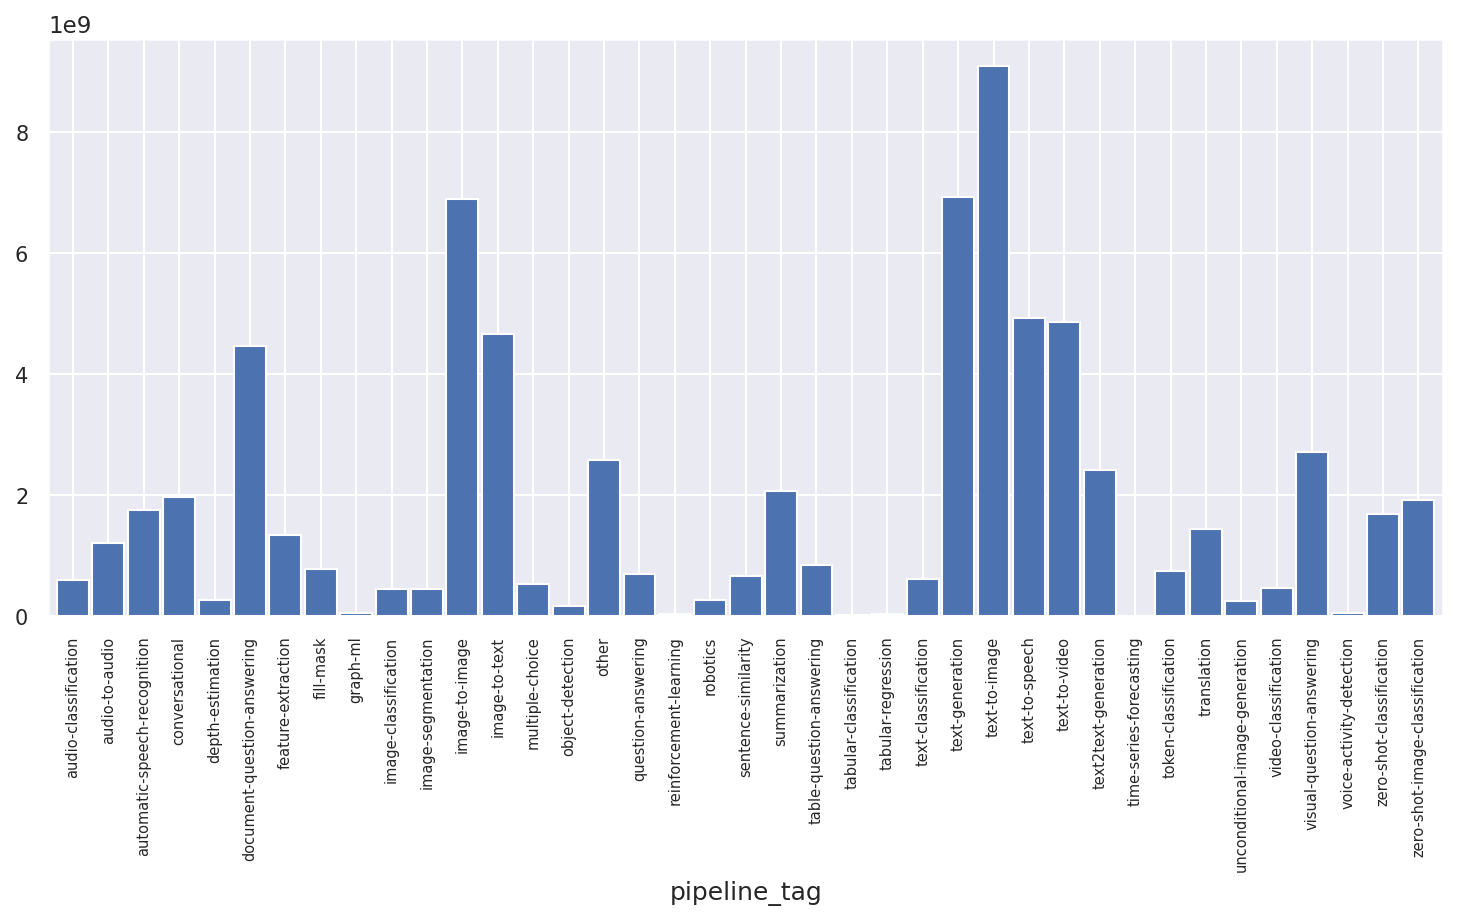

In [18]:
fig, ax = plt.subplots(figsize=(12, 5), dpi=150)
df.groupby('pipeline_tag')['repo_size'].mean().plot(kind='bar', width=0.9)
ax.tick_params(axis='x', which='major', labelsize=7)
ax.tick_params(axis='y', which='major', labelsize=10)
plt.show()

In [133]:
df.groupby('pipeline_tag').count()['likes'].plot(kind='bar')
plt.show()

In [126]:
res = (df.groupby(['likes', 'pipeline_tag'])
          ['action'].value_counts()
          .unstack(-1).fillna(0)
          ['kill'].mean(level='level'))

,likes,num_downloads,repo_size
likes,1.000000,0.121659,0.034073
num_downloads,0.121659,1.000000,0.000802
repo_size,0.034073,0.000802,1.000000


In [129]:
corr = df[['likes', 'num_downloads', 'repo_size']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,likes,num_downloads,repo_size
likes,1.000,0.122,0.034
num_downloads,0.122,1.000,0.001
repo_size,0.034,0.001,1.000


In [107]:
, tz
import time
import os
import pytz

In [63]:
datetime.fromisoformat(c.lastModified)

ValueError: Invalid isoformat string: '2021-07-07T08:14:27.000Z'

In [113]:
t = parser.parse(c.lastModified,ignoretz=True).replace(tzinfo=datetime.timezone.utc)
t

datetime.datetime(2021, 7, 7, 8, 14, 27, tzinfo=datetime.timezone.utc)

In [111]:
t = t.replace(tzinfo=datetime.timezone.utc)

In [112]:
t

datetime.datetime(2021, 7, 7, 8, 14, 27, tzinfo=datetime.timezone.utc)

In [105]:
t.tzinfo = datetime.timezone.utc

AttributeError: attribute 'tzinfo' of 'datetime.datetime' objects is not writable

In [98]:
t

datetime.datetime(2021, 7, 7, 8, 14, 27, tzinfo=tzutc())

In [86]:
t.tzinfo

tzlocal()

In [81]:
datetime.strptime(''.join(c.lastModified.split('.')[:-1]), "%Y-%m-%dT%H:%M:%S")

datetime.datetime(2021, 7, 7, 8, 14, 27)

'2021-07-07T08:14:27'

In [75]:
"%Y-%m-%dT%H:%M:%SZ"

'%Y-%m-%dT%H:%M:%SZ'

In [25]:
c.modelId

'albert-base-v1'

In [8]:
%history -g -f filename

In [39]:
df['num_downloads'][df['num_downloads']<1e5]

0        48115
2          636
3         9316
4          466
5         3096
         ...  
51922        0
51923       25
51924        4
51925       11
51926        9
Name: num_downloads, Length: 51663, dtype: int64

In [96]:
c

ModelInfo: { 
  {'_id': '62b1f5e56a5435fd9a63bac6',
   'author': 'Sayan01',
   'config': {'architectures': ['BertForSequenceClassification'], 'model_type': 'bert'},
   'disabled': False,
   'downloads': 9,
   'gated': False,
   'id': 'Sayan01/tiny-bert-mrpc-distilled',
   'lastModified': '2022-07-15T19:32:31.000Z',
   'library_name': 'transformers',
   'likes': 0,
   'mask_token': '[MASK]',
   'modelId': 'Sayan01/tiny-bert-mrpc-distilled',
   'pipeline_tag': 'text-classification',
   'private': False,
   'securityStatus': None,
   'sha': 'a6848fc64ab85be64b0b18b25d0b541e67c8027a',
   'siblings': [RepoFile: {'blob_id': 'ac481c8eb05e4d2496fbe076a38a7b4835dd733d', 'lfs': None, 'rfilename': '.gitattributes', 'size': 1173},
                RepoFile: {'blob_id': '0348ea97130c017c407fcfb6fd4003859f17b84c', 'lfs': None, 'rfilename': '.gitignore', 'size': 13},
                RepoFile: {'blob_id': '2a12171c3311b141e5e027f51ca9db6df62b44ae', 'lfs': None, 'rfilename': 'config.json', 'size': 1033}

In [134]:
with open('model_infor_hf.pkl', 'rb') as f:
    data = pickle.load(f)

In [136]:
not_working_data = [i for i in data if i['status']!='working']
not_df = pd.DataFrame(not_working_data)

In [153]:
not_df.iloc[1]['status']

huggingface_hub.utils._errors.GatedRepoError('403 Client Error. (Request ID: Root=1-64a9a2f7-5f4a5c5b70ccbb42118748b1)\n\nCannot access gated repo for url https://huggingface.co/api/models/Rei/DialoGPT-medium-kurisu?blobs=True.\nAccess to model Rei/DialoGPT-medium-kurisu is restricted and you are not in the authorized list. Visit https://huggingface.co/Rei/DialoGPT-medium-kurisu to ask for access.')

In [154]:
from huggingface_hub import login

auth_token = ''
login(auth_token)

Token will not been saved to git credential helper. Pass `add_to_git_credential=True` if you want to set the git credential as well.
Token is valid.
Your token has been saved to /home/ubuntu/.cache/huggingface/token
Login successful


In [163]:
not_df.iloc[4]['status']

huggingface_hub.utils._errors.GatedRepoError('403 Client Error. (Request ID: Root=1-64a9a613-07e40a245ea675b451ad216c)\n\nCannot access gated repo for url https://huggingface.co/api/models/cvcio/mediawatch-el-topics?blobs=True.\nAccess to model cvcio/mediawatch-el-topics is restricted and you are not in the authorized list. Visit https://huggingface.co/cvcio/mediawatch-el-topics to ask for access.')

In [161]:
from huggingface_hub import notebook_login
notebook_login()

In [164]:
repo_info('cvcio/mediawatch-el-topics')

RepositoryNotFoundError: 401 Client Error. (Request ID: Root=1-64aa576f-6708fc7d00ca337d74931115)

Repository Not Found for url: https://huggingface.co/api/models/cvcio/mediawatch-el-topics.
Please make sure you specified the correct `repo_id` and `repo_type`.
If you are trying to access a private or gated repo, make sure you are authenticated.
Invalid username or password.

In [157]:
import requests
headers = {"Authorization": f"Bearer {auth_token}"}
API_URL = "https://datasets-server.huggingface.co/is-valid?dataset=mozilla-foundation/common_voice_10_0"
def query():
    response = requests.get(API_URL, headers=headers)
    return response.json()
data = query()

In [158]:
data

{'error': 'The dataset does not exist, or is not accessible with the current credentials (private or gated). Please check the spelling of the dataset name or retry with other authentication credentials.'}